In [11]:
# Import the libraries needed

# datetime for handling dates and times
import datetime as dt
# Specific import to make use of the datetime functionality
from datetime import datetime

# yfinance is used to fetch data 
import yfinance as yf

# pandas for data manipulation and analysis
import pandas as pd

# matplotlib for additional customization of the plots 
import matplotlib.pyplot as plt

# seaborn for statistical data visualization
import seaborn as sns

# numpy for numerical computations 
import numpy as np

# ta is a technical analysis library 
import ta

In [12]:
# Import the necessary libraries

# The code will focus on four companies of the S&P 500 as well as the SPY and QQQ indices

# Define a function to clean the collected data by dropping NaN values and resetting the index
def clean_data(dataframe):
    # Drop rows with NaN values
    dataframe.dropna(inplace=True)
    # Reset index after dropping rows
    dataframe.reset_index(drop=True, inplace=True)

# Define a function to get the historical stock data with additional technical indicators and flexible parameters
def get_stock_data(ticker, start_date, end_date, volatility_window=21):
    # Download the historical stock data
    data = yf.download(ticker, start=start_date, end=end_date)
    # Reset the index of the DataFrame
    data.reset_index(inplace=True)

    # Calculate Average True Range (ATR)
    atr = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close'], window=14)
    data['ATR'] = atr.average_true_range()

    # Calculate returns and volatility (standard deviation of returns) with a customizable window
    data['Returns'] = data['Close'].pct_change()
    data['Volatility'] = data['Returns'].rolling(window=volatility_window).std()

    # Calculate percentage gain or loss
    data['Percentage Gain/Loss'] = data['Returns'] * 100

    # Add technical indicators
    data['SMA_50'] = ta.trend.SMAIndicator(data['Close'], window=50).sma_indicator()
    data['EMA_50'] = ta.trend.EMAIndicator(data['Close'], window=50).ema_indicator()
    bb = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2)
    data['Upper'] = bb.bollinger_hband()
    data['Middle'] = bb.bollinger_mavg()
    data['Lower'] = bb.bollinger_lband()
    data['RSI'] = ta.momentum.RSIIndicator(data['Close'], window=14).rsi()
    macd = ta.trend.MACD(data['Close'], window_fast=12, window_slow=26, window_sign=9)
    data['MACD'] = macd.macd()
    data['MACD Signal'] = macd.macd_signal()

    # Clean the data
    clean_data(data)
    return data

# Function to get stock beta with a customizable benchmark index
def get_stock_beta(ticker, start_date, end_date, benchmark='SPY'):
    # Download the stock and market data
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')
    market_data = yf.download(benchmark, start=start_date, end=end_date, interval='1mo')

    # Calculate returns for stock and market data
    stock_returns = stock_data['Close'].pct_change().dropna()
    market_returns = market_data['Close'].pct_change().dropna()

    # Calculate covariance and variance to compute beta
    covariance = stock_returns.cov(market_returns)
    variance = market_returns.var()
    beta = covariance / variance

    return beta

# Define a function to save the DataFrame to an Excel file
def save_dataframes_to_excel(dataframes, excel_file):
    # Saves a list of dataframes to an Excel file with separate sheets for each dataframe
    with pd.ExcelWriter(excel_file) as writer:
        for ticker, data in dataframes.items():
            data.to_excel(writer, sheet_name=ticker, index=False)
            
# Define the tickers and date range for historical data
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA', 'SPY', 'QQQ']
start_date = '2000-01-01'
end_date = dt.datetime.today().strftime('%Y-%m-%d')

# Dictionary to store the historical data for the selected tickers
historical_data = {}

# Get the historical data for each ticker
for ticker in tickers:
    # Get the historical data for each ticker
    historical_data[ticker] = get_stock_data(ticker, start_date, end_date)
    # Get the beta value for each ticker
    beta = get_stock_beta(ticker, start_date, end_date)
    # Add the calculated beta to the data
    historical_data[ticker]['Beta'] = beta
    
# Convert each variable to a DataFrame
spy = historical_data['SPY']
qqq = historical_data['QQQ']
aapl = historical_data['AAPL']
msft = historical_data['MSFT']
googl = historical_data['GOOGL']
amzn = historical_data['AMZN']
tsla = historical_data['TSLA']

# Save the DataFrames to an Excel file
save_dataframes_to_excel(historical_data, 'each_ticker_data.xlsx')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [13]:
# Add a 'Ticker' column to each DataFrame and concatenate them into one
combined_data = []

# Loop through each ticker and its corresponding historical data
for ticker, data in historical_data.items():
    # Add a 'Ticker' column to the DataFrame, which will be used to identify the stock in the combined data
    data['Ticker'] = ticker
    # Append the DataFrame to the list of combined data
    combined_data.append(data)

# Concatenate all the DataFrames into one. This will make a large DataFrame with data from all the tickers.
all_data = pd.concat(combined_data, ignore_index=True)

# Show the combined DataFrame. This is useful for checking that the data has been combined correctly.
print(all_data.head())

# Save the combined DataFrame to an Excel file. This allows you to easily access the combined data later without having to run the script again.
all_data.to_excel("combined_data.xlsx", index=False)

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2000-03-14  1.082310  1.109375  1.017857  1.020089   0.868217  428579200   
1 2000-03-15  1.032366  1.073661  1.018973  1.037946   0.883415  443609600   
2 2000-03-16  1.047433  1.089286  1.022321  1.085379   0.923786  378100800   
3 2000-03-17  1.072545  1.116071  1.068080  1.116071   0.949908  305043200   
4 2000-03-20  1.102679  1.127232  1.092634  1.098214   0.934710  204489600   

        ATR   Returns  Volatility  ...    SMA_50    EMA_50     Upper  \
0  0.065468 -0.058217    0.046187  ...  0.988284  1.021796  1.162792   
1  0.064698  0.017505    0.044138  ...  0.989054  1.022429  1.162067   
2  0.064860  0.045699    0.044855  ...  0.992458  1.024898  1.164142   
3  0.063655  0.028278    0.044081  ...  0.996208  1.028473  1.169603   
4  0.061579 -0.016000    0.044322  ...  1.001208  1.031208  1.169614   

     Middle     Lower        RSI      MACD  MACD Signal     Beta  Ticker  
0  1.061251  0.959710  

In [6]:
# Examine the combined Dataframe 
all_data

Date        Open        High         Low       Close   Adj Close  \
0     2000-03-14    1.082310    1.109375    1.017857    1.020089    0.868216   
1     2000-03-15    1.032366    1.073661    1.018973    1.037946    0.883415   
2     2000-03-16    1.047433    1.089286    1.022321    1.085379    0.923786   
3     2000-03-17    1.072545    1.116071    1.068080    1.116071    0.949909   
4     2000-03-20    1.102679    1.127232    1.092634    1.098214    0.934710   
...          ...         ...         ...         ...         ...         ...   
36978 2023-05-03  319.750000  322.470001  317.179993  317.290009  317.290009   
36979 2023-05-04  317.059998  318.230011  315.119995  316.170013  316.170013   
36980 2023-05-05  318.470001  323.760010  316.209991  322.890015  322.890015   
36981 2023-05-08  322.420013  324.040009  321.320007  323.690002  323.690002   
36982 2023-05-09  322.000000  322.880005  321.320007  321.640015  321.640015   

          Volume       ATR   Returns  Volatility  ...      SMA_50      EMA_50  \
0      428579200  0.065468 -0.058217    0.046187  ...    0.988284    1.021796   
1      443609600  0.064698  0.017505    0.044138  ...    0.989054    1.022429   
2      378100800  0.064860  0.045699    0.044855  ...    0.992458    1.024898   
3      305043200  0.063655  0.028278    0.044081  ...    0.996208    1.028473   
4      204489600  0.061579 -0.016000    0.044322  ...    1.001208    1.031208   
...          ...       ...       ...         ...  ...         ...         ...   
36978   59882100  4.901872 -0.006544    0.010055  ...  308.485799  310.058485   
36979   50224500  4.773882 -0.003530    0.010057  ...  308.924199  310.298152   
36980   51776000  4.975033  0.021254    0.010852  ...  309.445599  310.791951   
36981   36465800  4.813959  0.002478    0.010781  ...  310.082399  311.297757   
36982   31675100  4.639390 -0.006333    0.010893  ...  310.636400  311.703336   

            Upper      Middle       Lower        RSI      MACD  MACD Signal  \
0        1.162792    1.061251    0.959710  47.019852  0.025365     0.030936   
1        1.162067    1.060024    0.957980  49.006911  0.020576     0.028864   
2        1.164142    1.063344    0.962546  53.947810  0.020374     0.027166   
3        1.169603    1.067864    0.966125  56.860527  0.022432     0.026219   
4        1.169614    1.073110    0.976605  54.693084  0.022364     0.025448   
...           ...         ...         ...        ...       ...          ...   
36978  323.471969  317.366499  311.261030  53.286267  2.516926     2.883316   
36979  323.473586  317.378999  311.284413  51.527736  2.195199     2.745692   
36980  324.170347  317.621001  311.071654  60.047325  2.454185     2.687391   
36981  324.976658  317.912001  310.847345  60.927750  2.692944     2.688502   
36982  325.377770  318.202502  311.027235  57.434937  2.685785     2.687958   

           Beta  Ticker  
0      1.403440    AAPL  
1      1.403440    AAPL  
2      1.403440    AAPL  
3      1.403440    AAPL  
4      1.403440    AAPL  
...         ...     ...  
36978  1.291091     QQQ  
36979  1.291091     QQQ  
36980  1.291091     QQQ  
36981  1.291091     QQQ  
36982  1.291091     QQQ  

[36983 rows x 21 columns]

In [7]:
# Function to check for missing values (NaN) in each DataFrame
def check_missing_values(dataframe, ticker):
    # Calculate the total number of missing values in the DataFrame
    missing_values = dataframe.isna().sum()
    # If there are any missing values, print the number of missing values for each column
    if missing_values.any():
        print(f"Missing values for {ticker}:")
        print(missing_values)
    # If there are no missing values, print a message indicating this
    else:
        print(f"No missing values found for {ticker}")
    print("\n")  # Print a newline for readability

# Check for missing values in each individual DataFrame
for ticker, data in historical_data.items():
    # Call the function to check for missing values for the current ticker's data
    check_missing_values(data, ticker)

# Check for missing values in the combined DataFrame (all_data)
# Since this DataFrame combines all the individual DataFrames, it's important to check it for missing values as well
check_missing_values(all_data, 'all_data')

No missing values found for AAPL


No missing values found for MSFT


No missing values found for AMZN


No missing values found for GOOGL


No missing values found for TSLA


No missing values found for SPY


No missing values found for QQQ


No missing values found for all_data




In [8]:
# Calculate summary statistics for the combined DataFrame
# This includes count, mean, std, min, 25%, 50%, 75%, max for each column in the DataFrame
summary_stats = all_data.describe()

# Display the summary statistics DataFrame
# This can provide useful information about the distribution of data in each column
summary_stats

Open          High           Low         Close     Adj Close  \
count  36983.000000  36983.000000  36983.000000  36983.000000  36983.000000   
mean      79.395644     80.135531     78.605549     79.400164     73.108462   
std       92.627980     93.410733     91.775665     92.632369     89.596296   
min        0.231964      0.235536      0.227143      0.234286      0.199405   
25%       14.789790     14.960481     14.603093     14.777277     14.343839   
50%       38.450001     38.750000     38.080002     38.430000     34.915356   
75%      117.924999    118.800003    116.884998    117.820000     99.165035   
max      479.220001    479.980011    476.059998    477.709991    468.296448   

             Volume           ATR       Returns    Volatility  \
count  3.698300e+04  36983.000000  36983.000000  36983.000000   
mean   1.436766e+08      1.673424      0.000824      0.019265   
std    2.100523e+08      2.400141      0.023219      0.013127   
min    1.436600e+06      0.007007     -0.518692      0.002192   
25%    4.536575e+07      0.361511     -0.008459      0.010391   
50%    7.993800e+07      0.782477      0.000671      0.015657   
75%    1.468325e+08      1.900152      0.010021      0.024147   
max    7.421641e+09     22.793229      0.344714      0.125605   

       Percentage Gain/Loss        SMA_50        EMA_50         Upper  \
count          36983.000000  36983.000000  36983.000000  36983.000000   
mean               0.082396     78.564677     78.576950     83.066145   
std                2.321948     91.730643     91.673555     96.738399   
min              -51.869199      0.255500      0.252765      0.264608   
25%               -0.845862     14.655798     14.619993     15.706815   
50%                0.067099     38.026990     38.085352     39.967213   
75%                1.002113    117.332400    117.064683    122.366276   
max               34.471362    466.966401    465.032744    490.640946   

             Middle         Lower           RSI          MACD   MACD Signal  \
count  36983.000000  36983.000000  36983.000000  36983.000000  36983.000000   
mean      79.073531     75.080917     53.634208      0.237928      0.236906   
std       92.270927     88.043491     12.175575      2.279349      2.133704   
min        0.246795      0.041562     16.564126    -25.271333    -22.213158   
25%       14.755729     13.741517     44.815462     -0.170037     -0.152818   
50%       38.292425     36.506487     53.709299      0.095939      0.098437   
75%      117.426250    112.367677     62.354975      0.672333      0.644279   
max      469.996501    460.058211     94.214138     38.067930     31.285426   

               Beta  
count  36983.000000  
mean       1.251689  
std        0.194862  
min        1.000000  
25%        1.039835  
50%        1.291091  
75%        1.403440  
max        1.531397

         Returns  Volatility
Ticker                      
AAPL    0.001190    0.021726
AMZN    0.001084    0.026615
GOOGL   0.000855    0.017350
MSFT    0.000501    0.016959
QQQ     0.000328    0.014459
SPY     0.000264    0.010508
TSLA    0.002152    0.033138


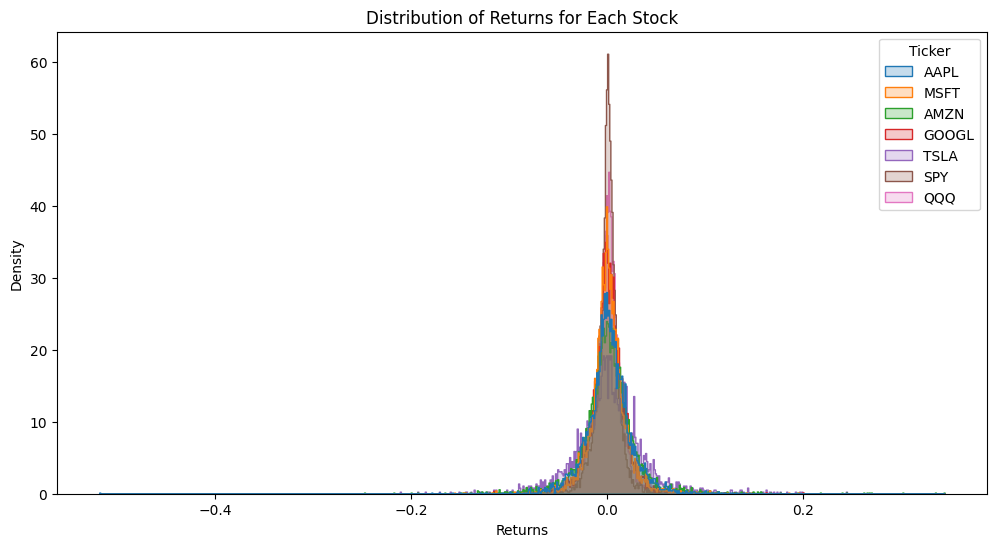

In [9]:
# Group the data by ticker and calculate the average returns and volatility
# This will create a new DataFrame with each ticker as the index and the average returns and volatility as columns
grouped_data = all_data.groupby('Ticker').agg({'Returns': 'mean', 'Volatility': 'mean'})
print(grouped_data)

# Plot the distribution of returns for each stock using a histogram
# This visualization will help understand the distribution of returns for each stock
plt.figure(figsize=(12, 6))  # Set the figure size

# Use seaborn's histplot function to plot the histogram
# The 'hue' parameter is used to differentiate the stocks, 'element' is set to 'step' for step-like histogram,
# 'stat' is set to 'density' to normalize the heights of bars, 'common_norm' is set to False to apply normalization per group
sns.histplot(data=all_data, x='Returns', hue='Ticker', element='step', stat='density', common_norm=False)

# Set the title and labels for the plot
plt.title('Distribution of Returns for Each Stock')
plt.xlabel('Returns')
plt.ylabel('Density')

# Save the plot as an image file
plt.savefig('distribution.png')

# Display the plot
plt.show()

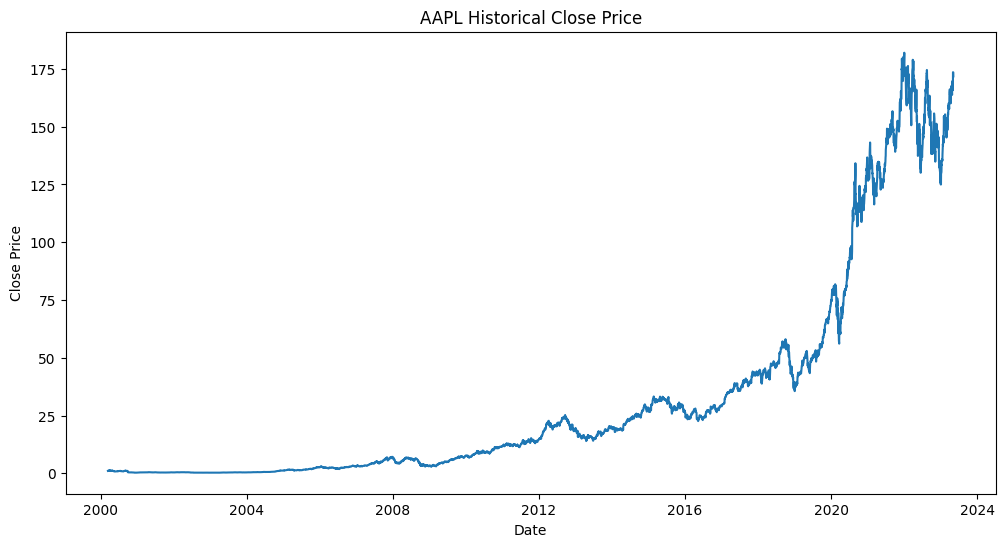

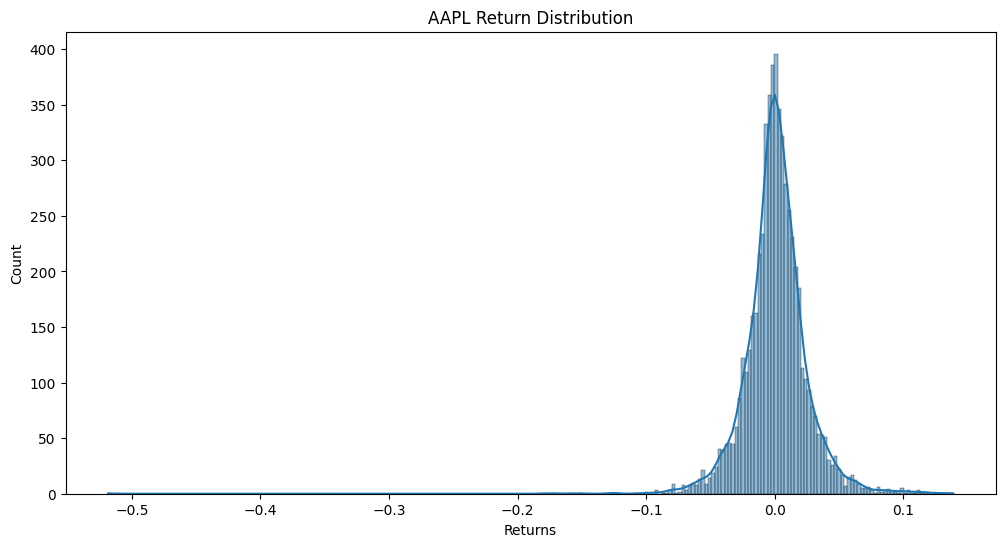

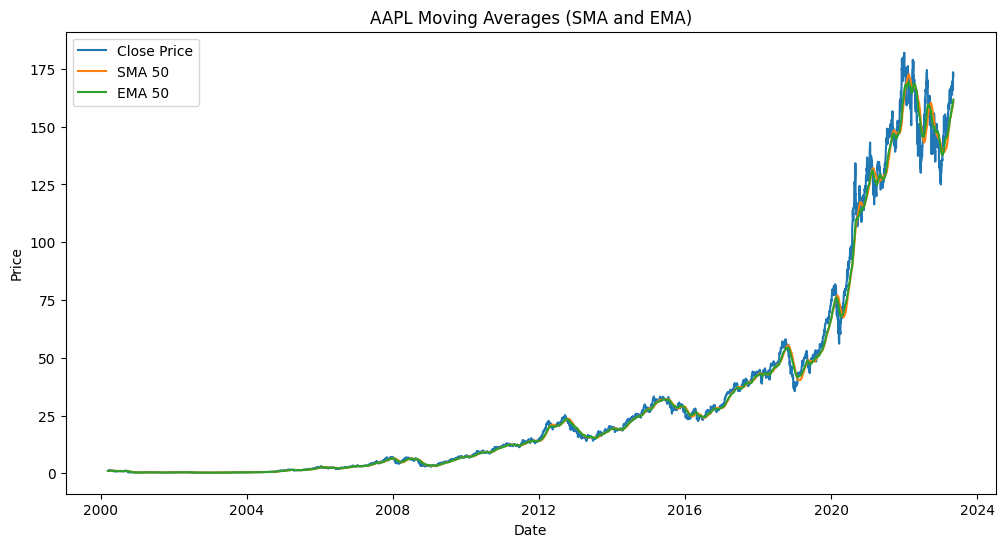

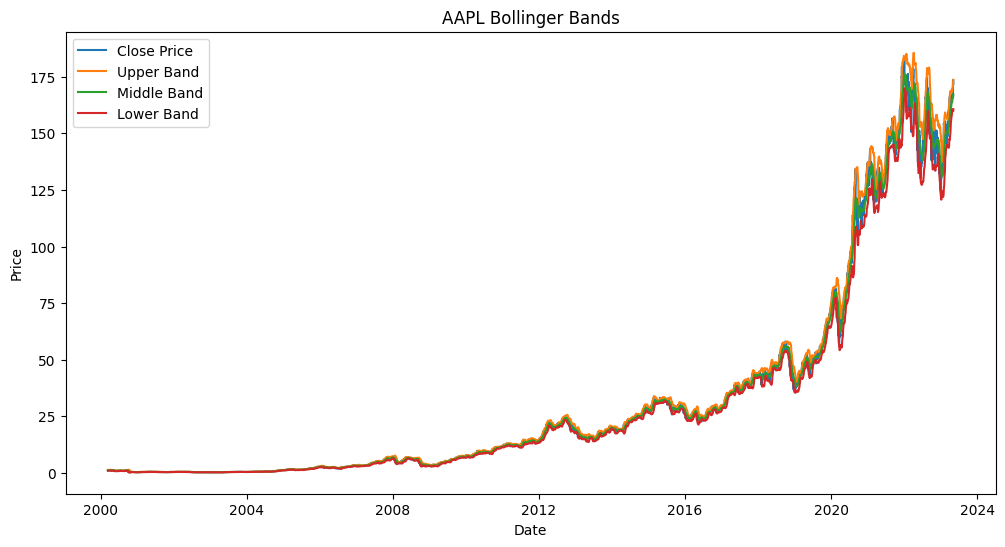

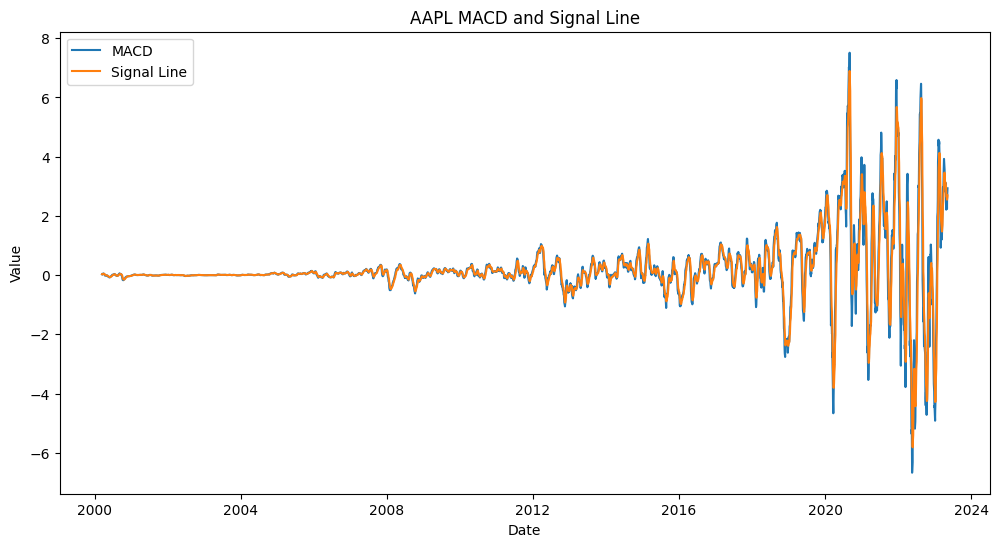

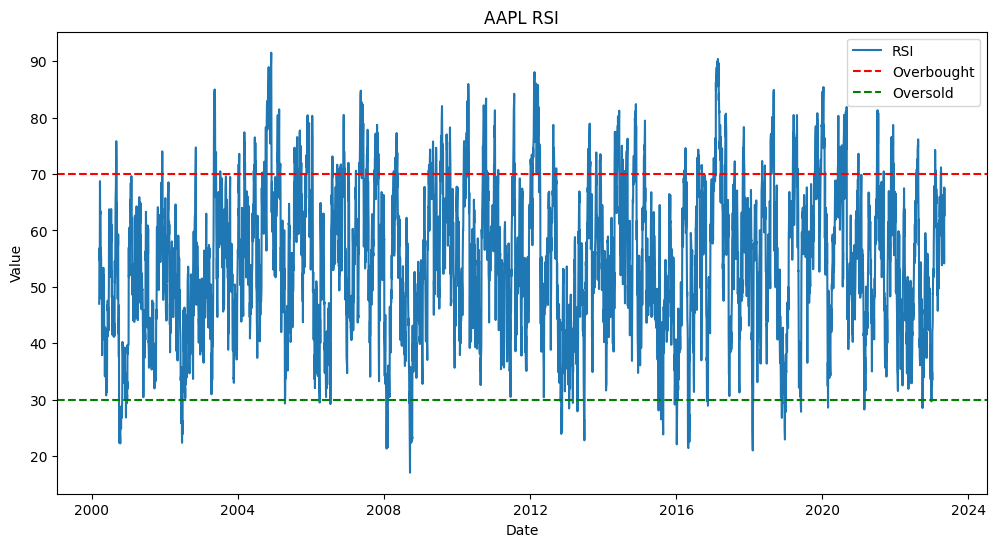

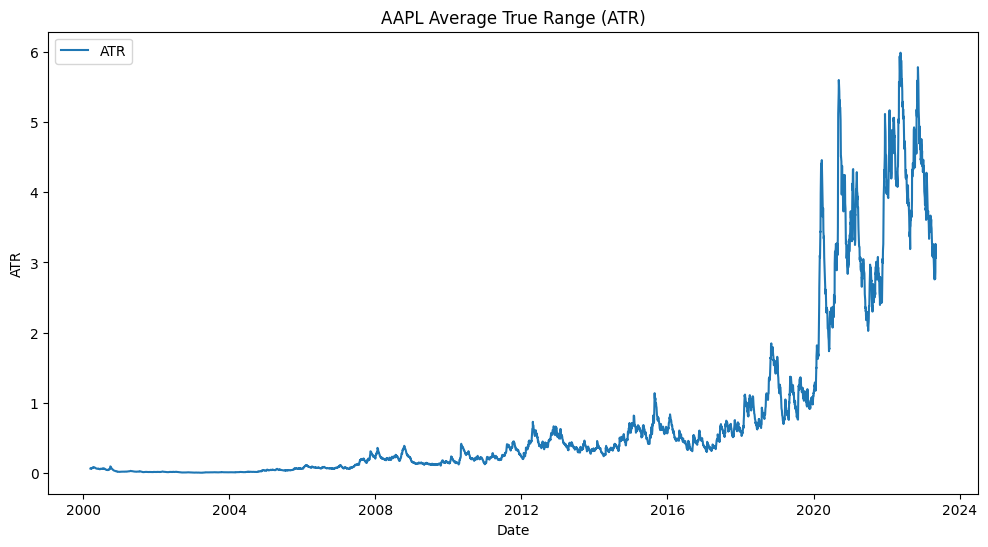

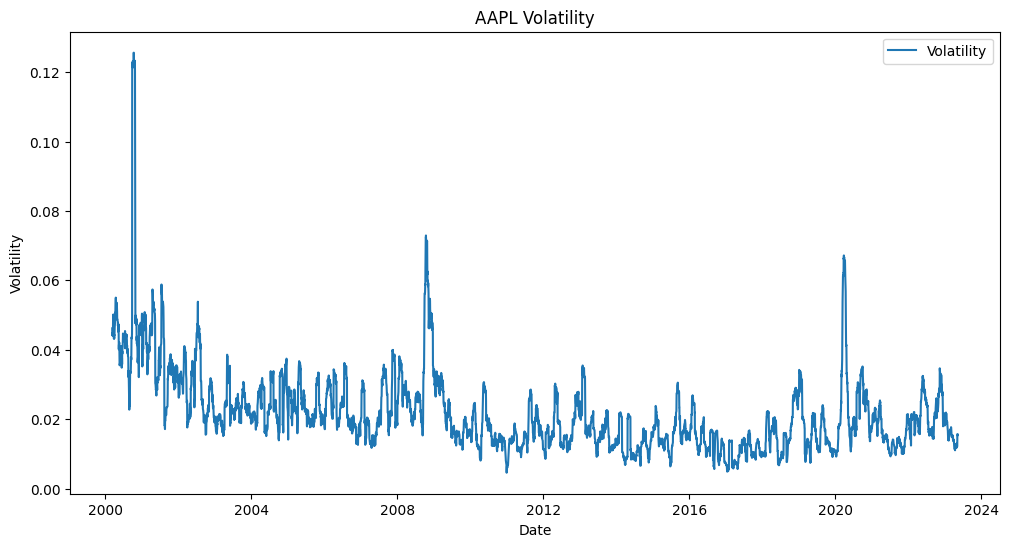

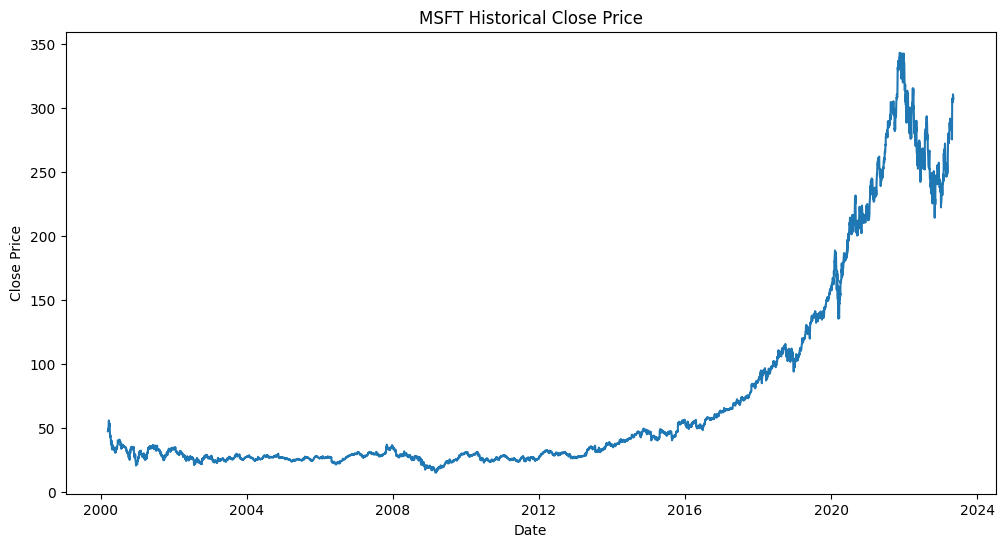

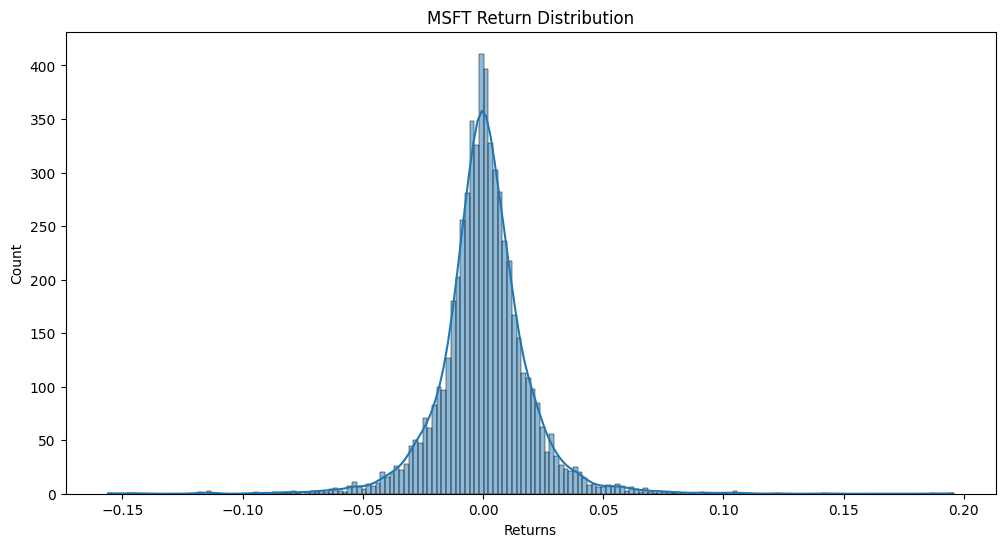

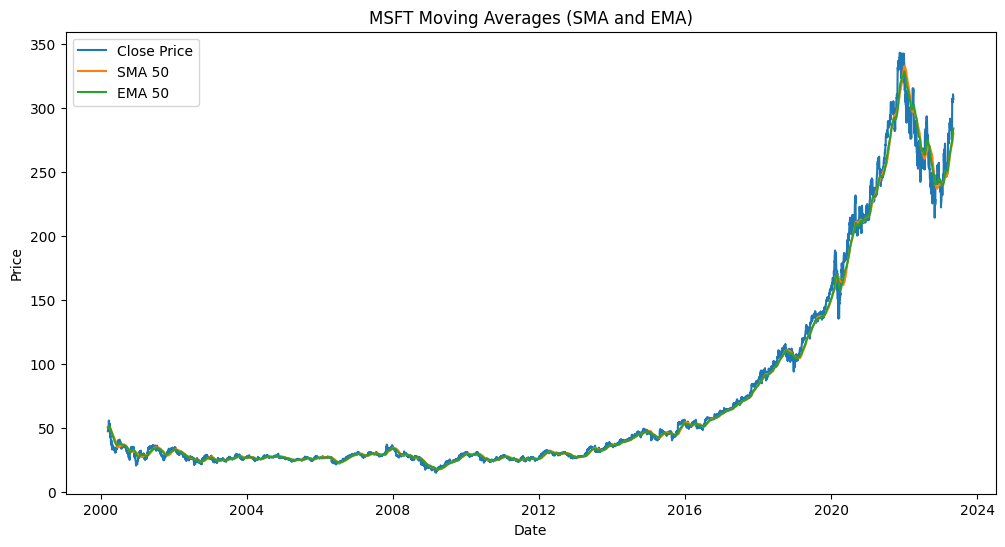

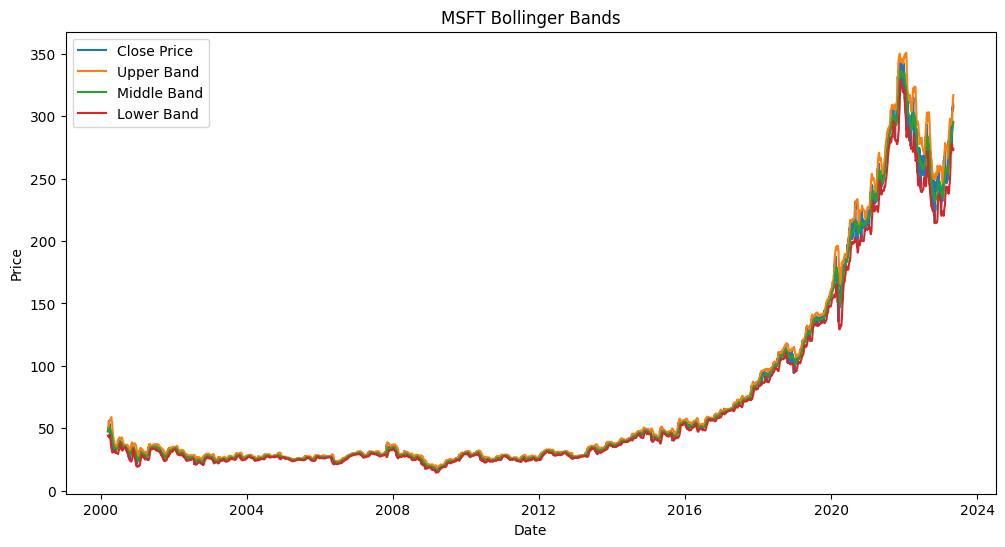

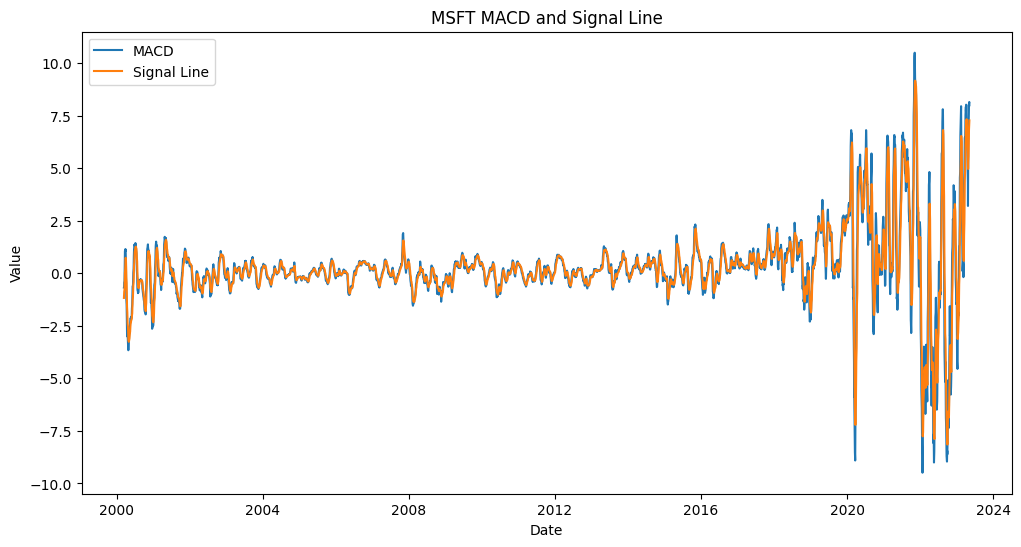

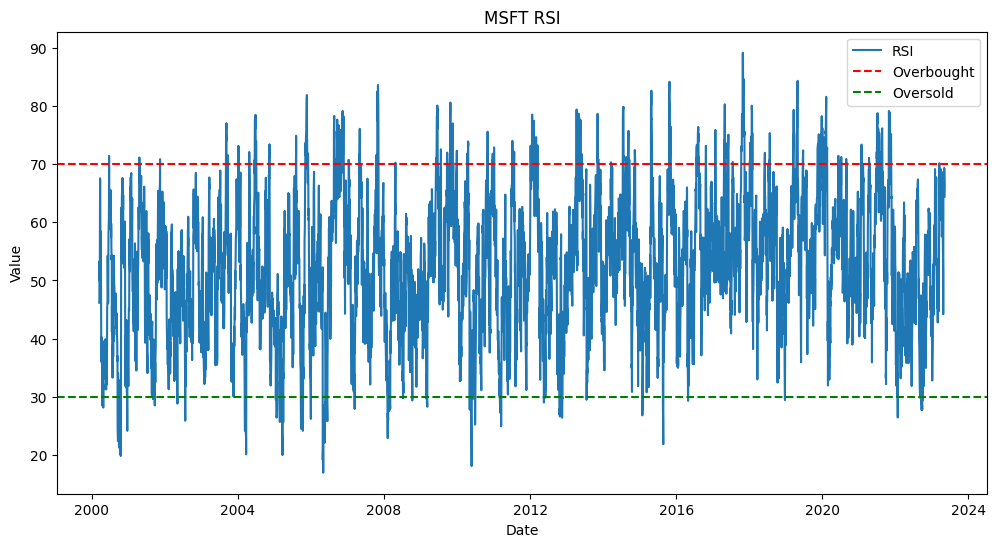

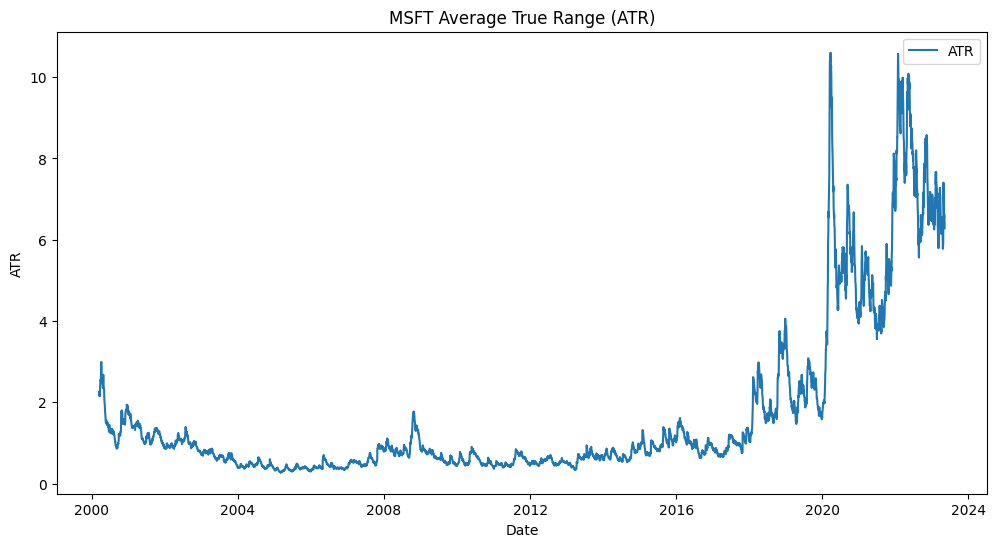

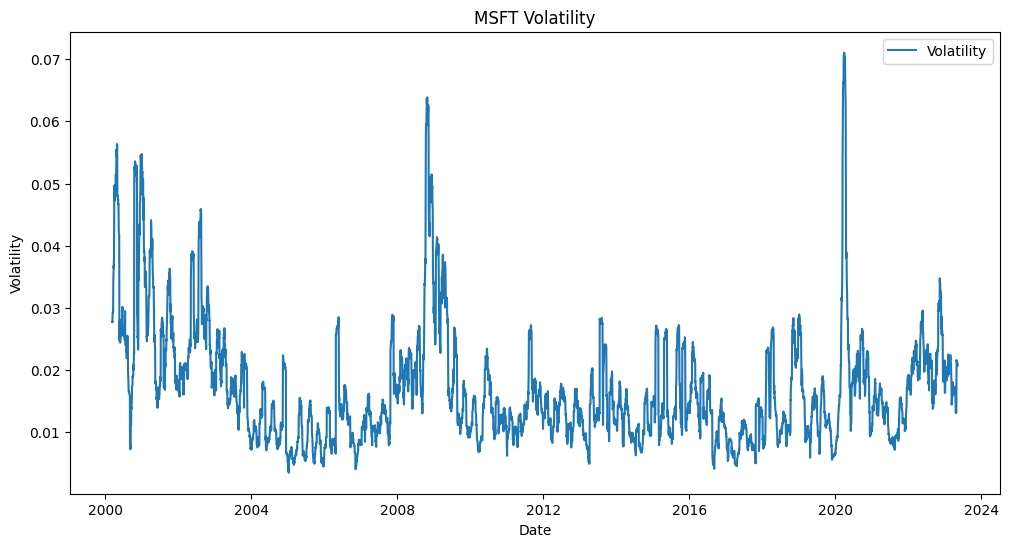

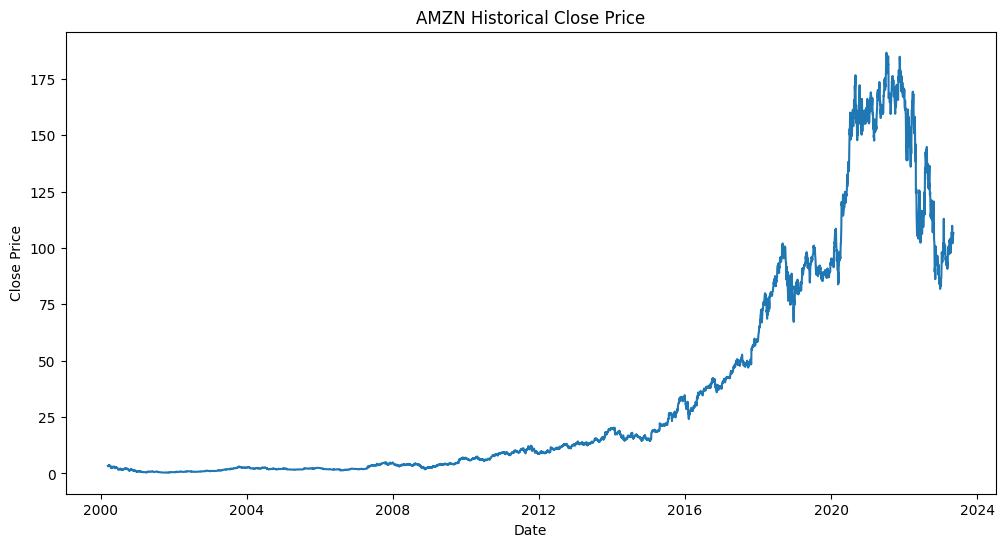

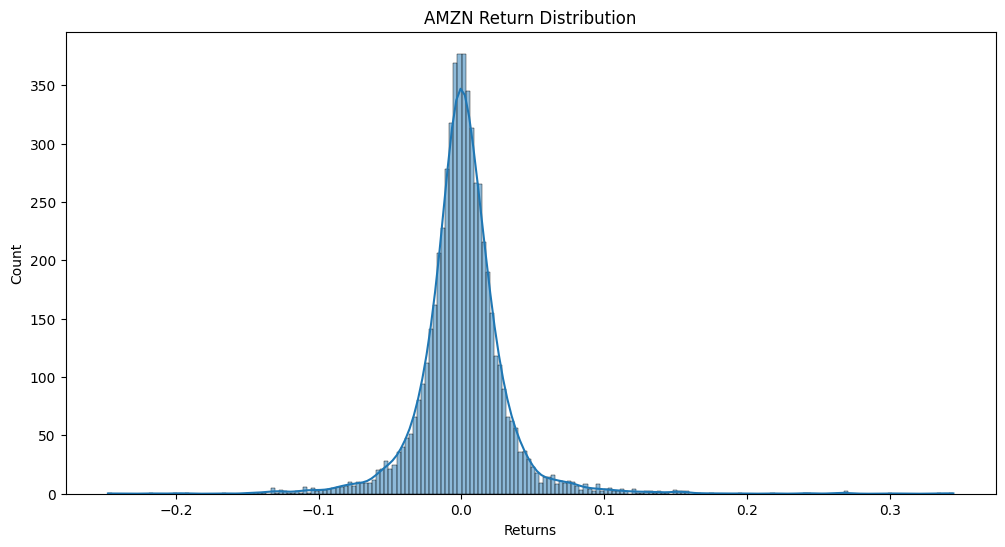

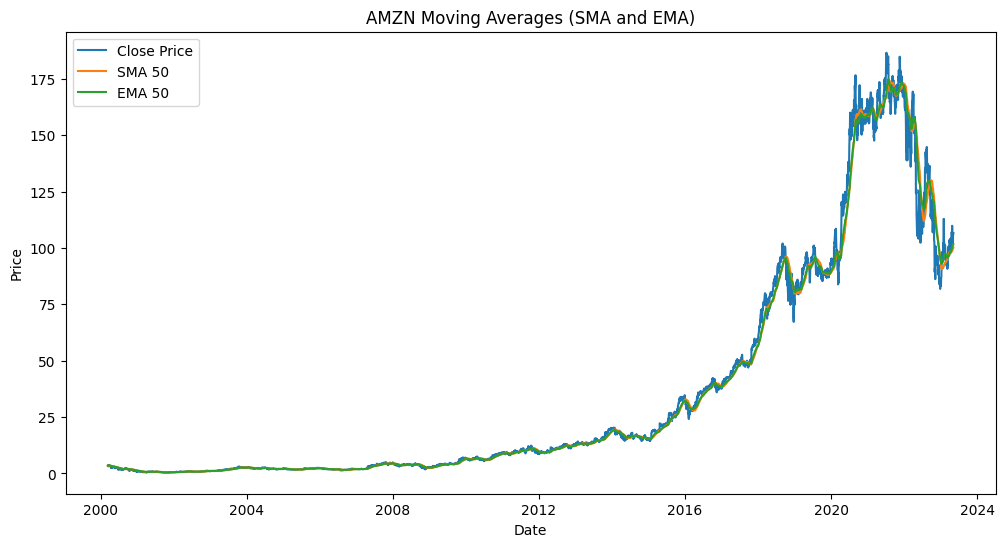

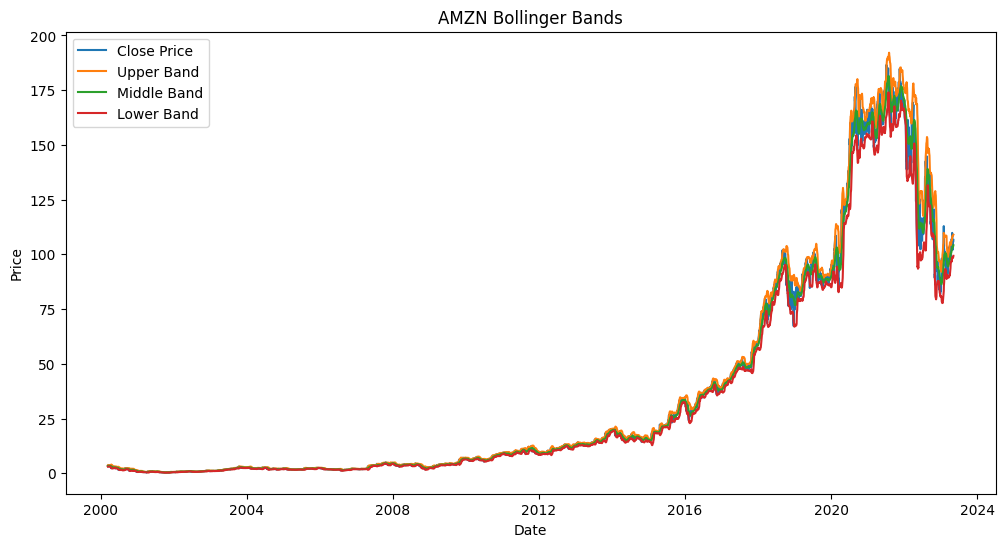

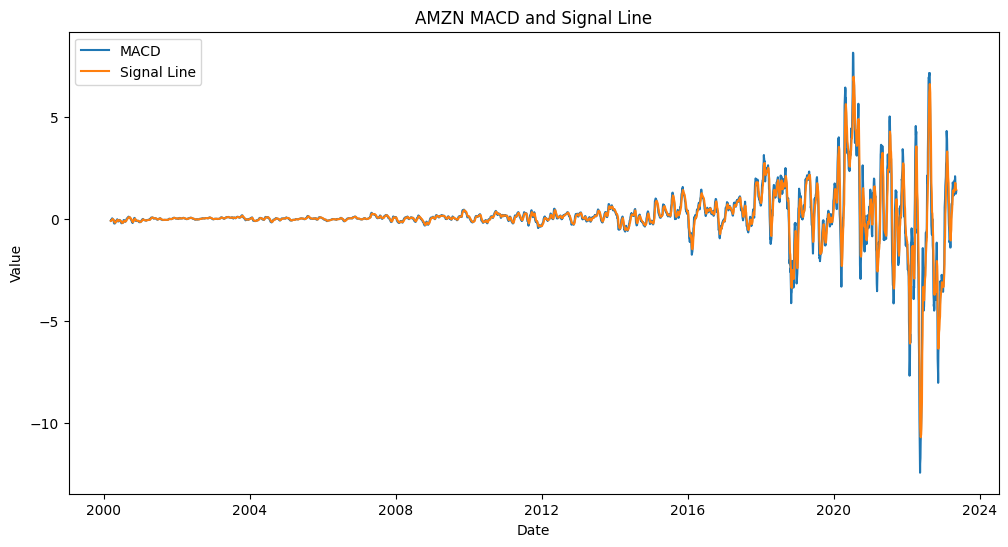

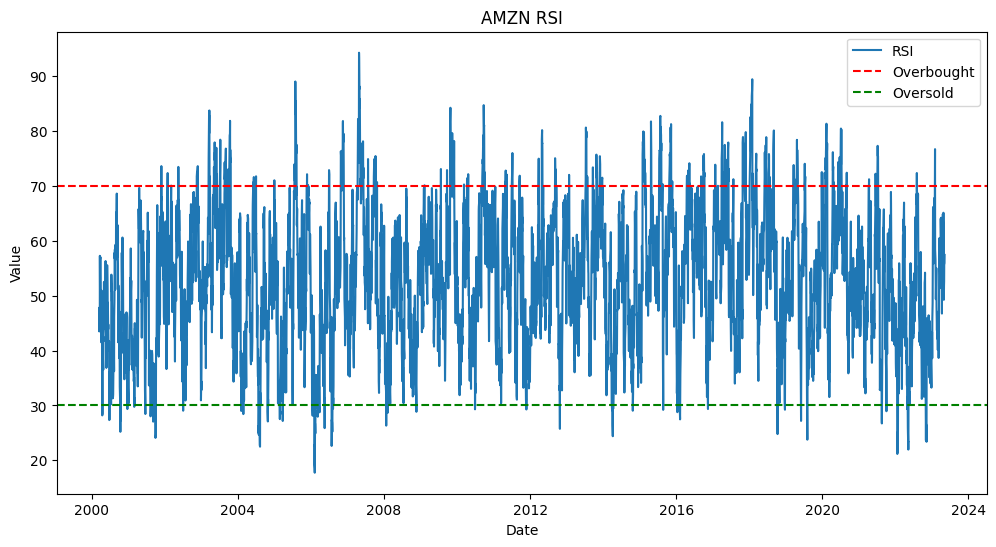

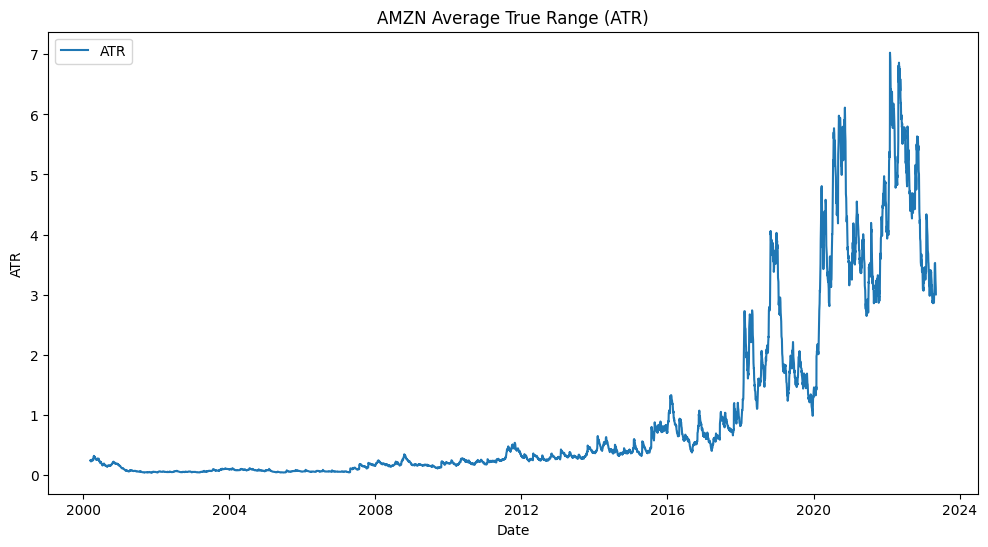

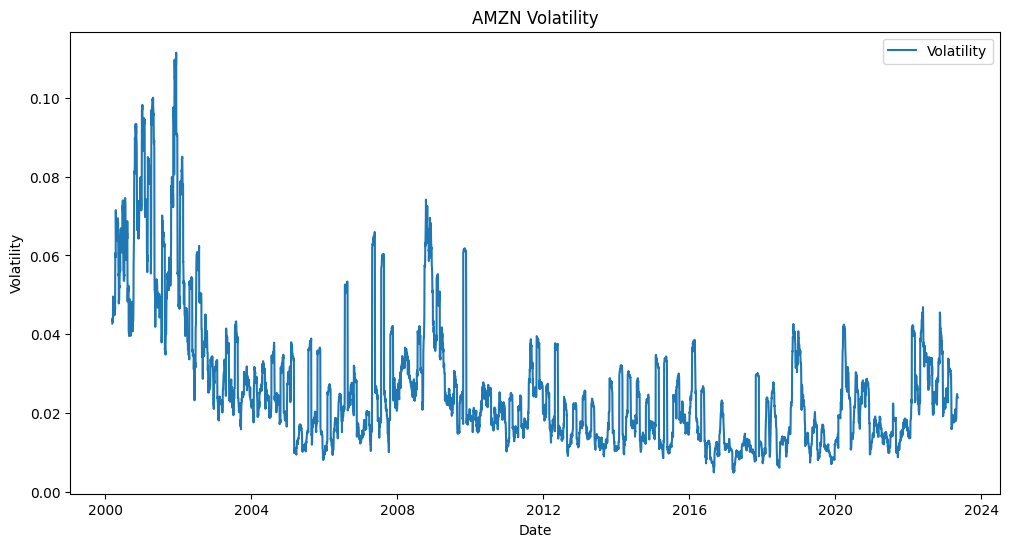

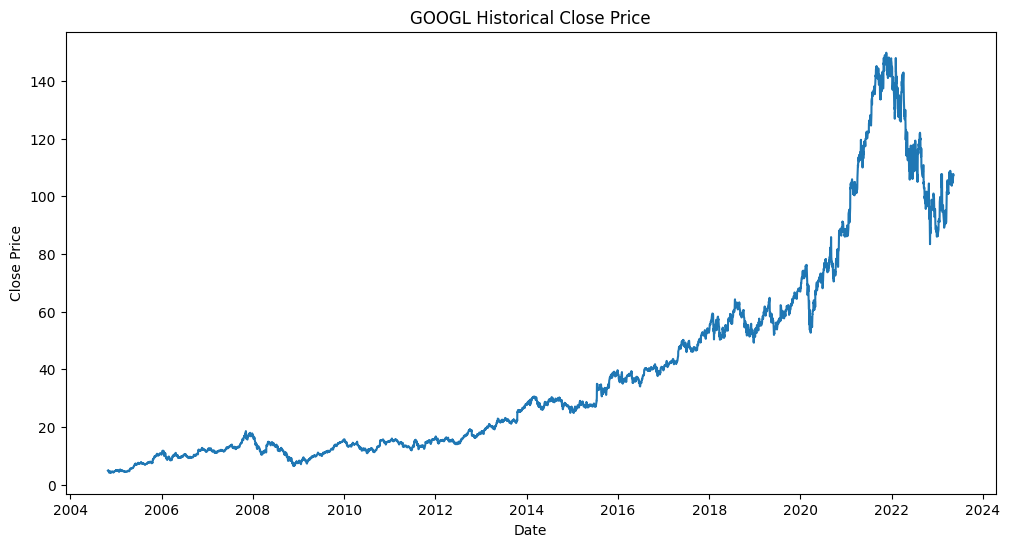

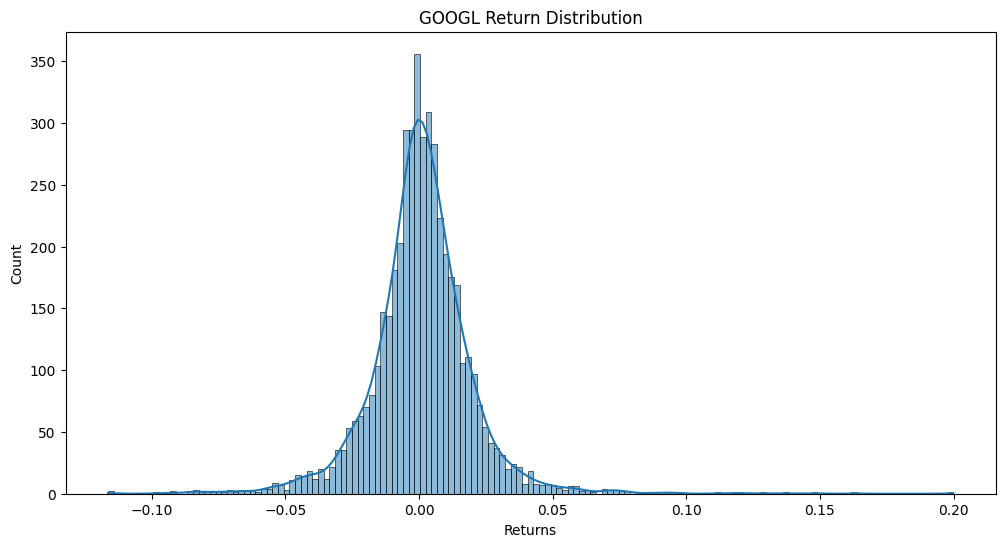

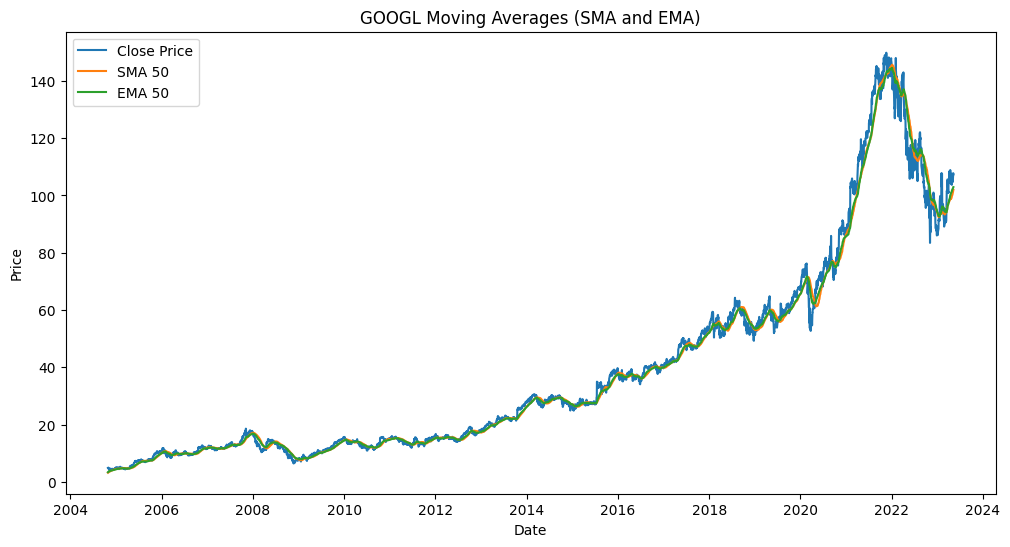

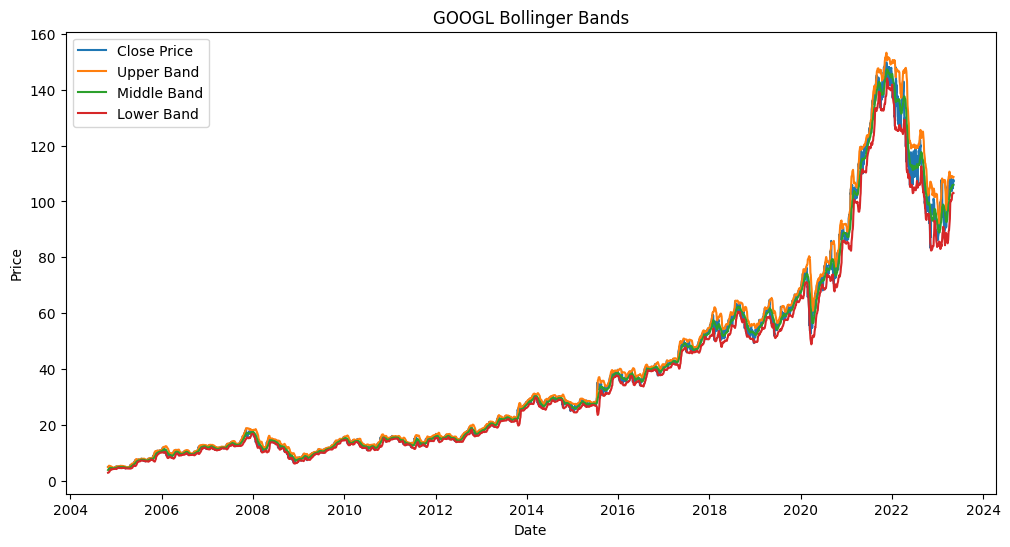

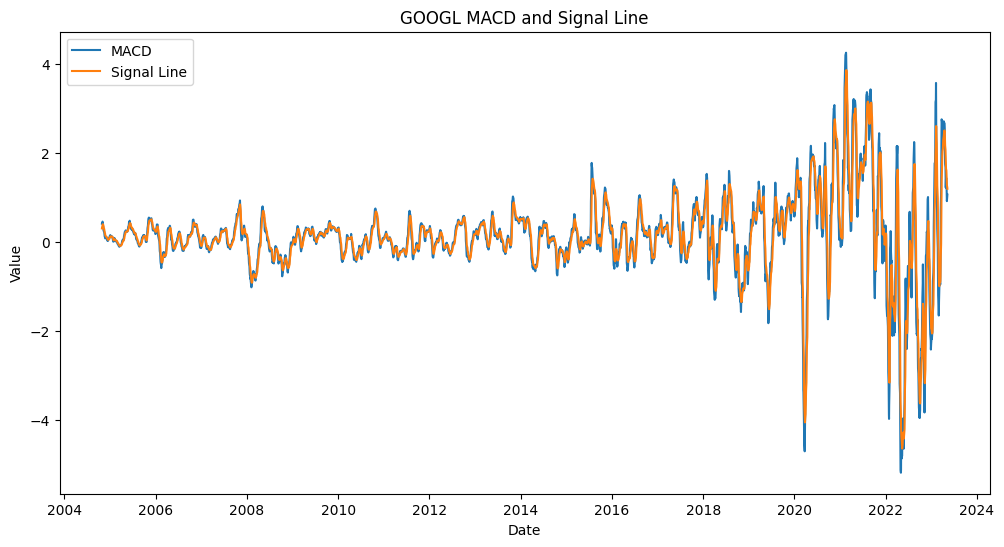

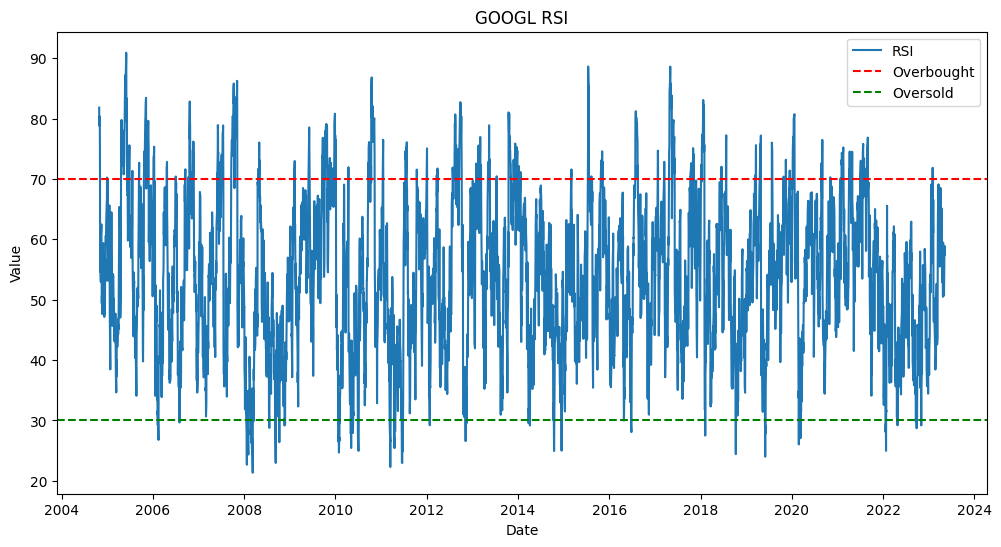

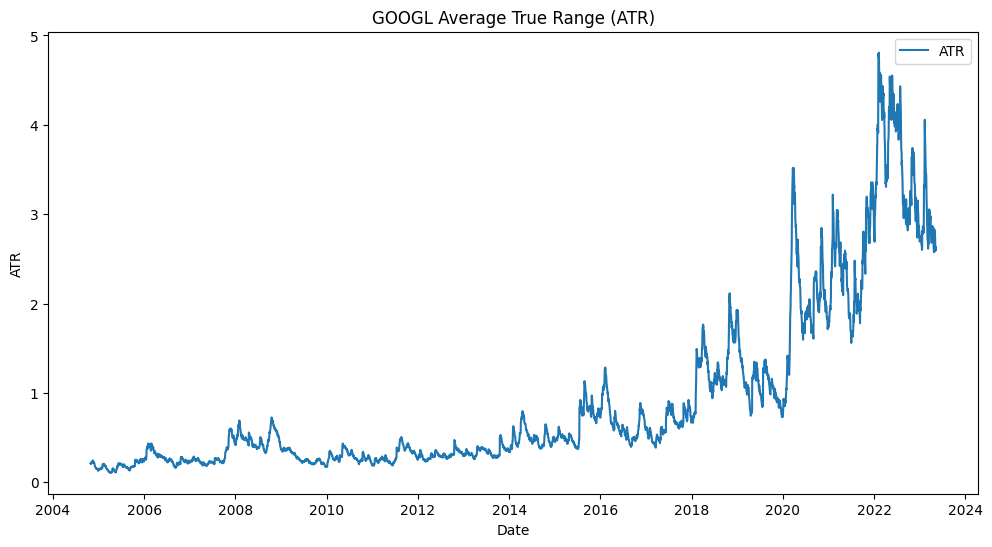

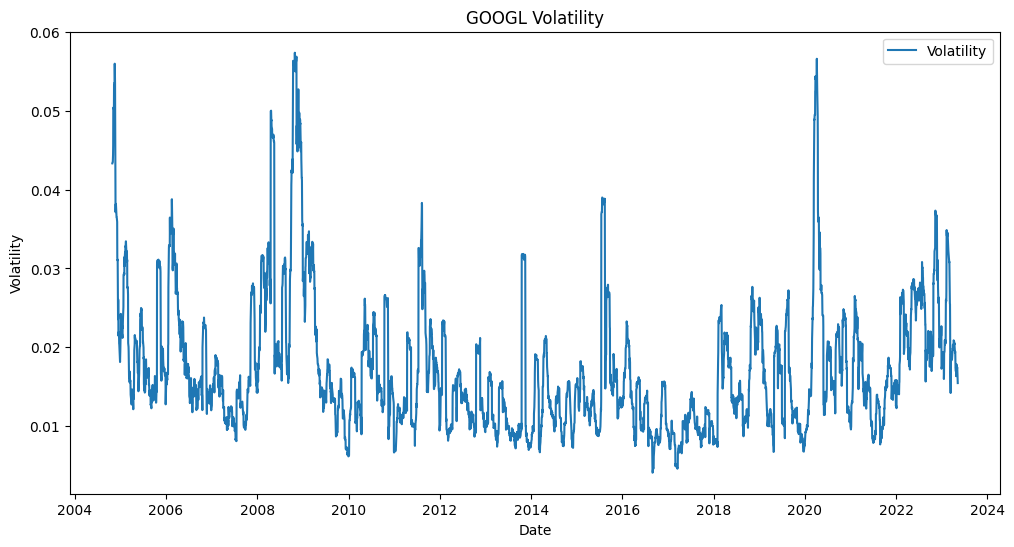

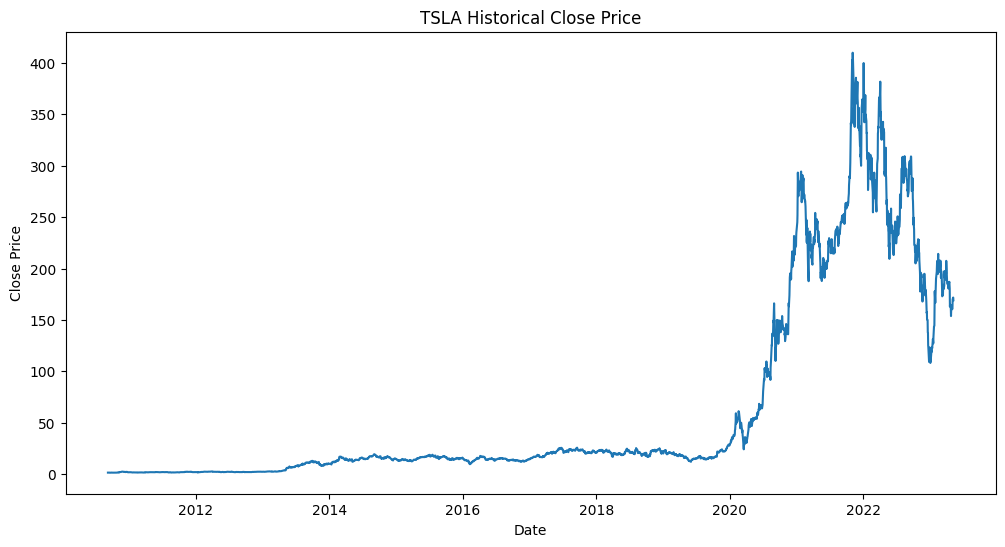

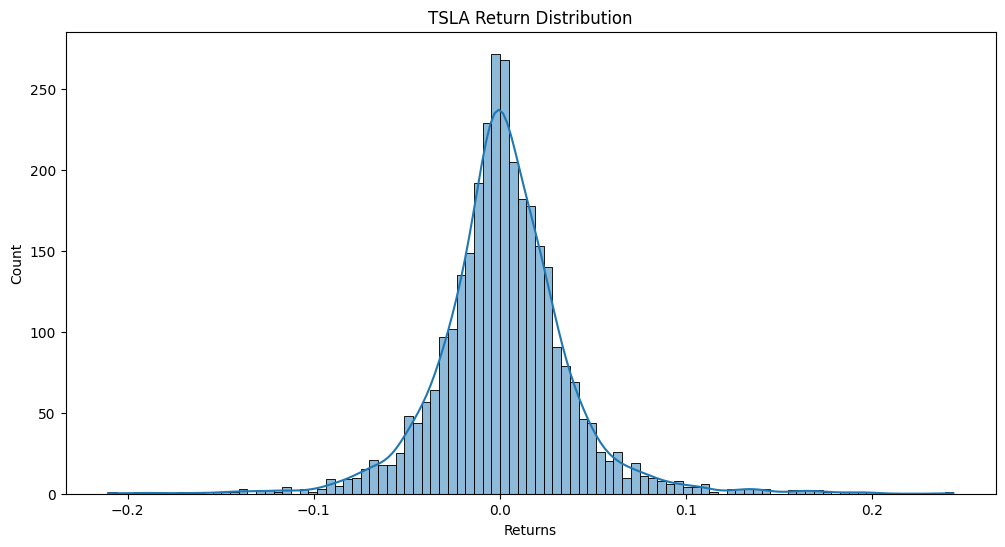

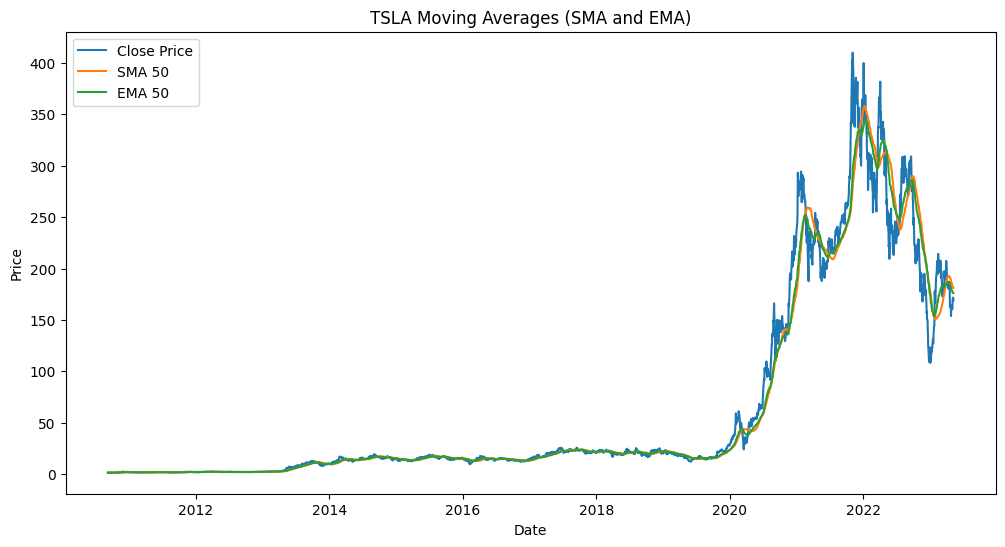

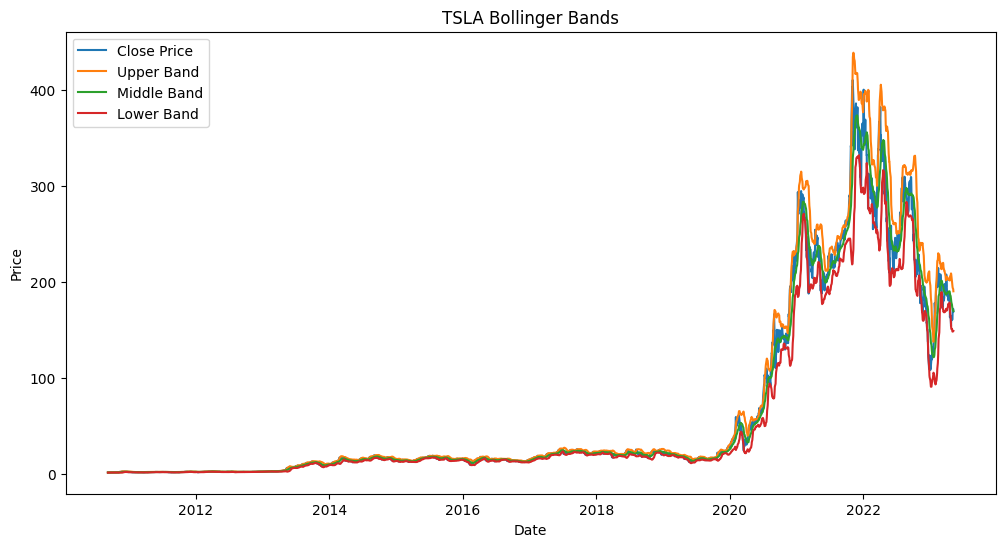

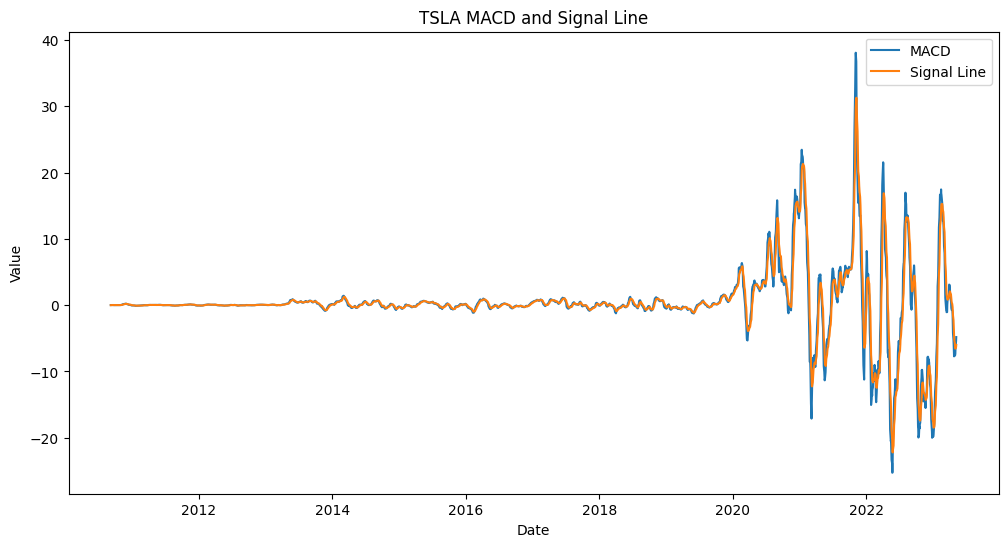

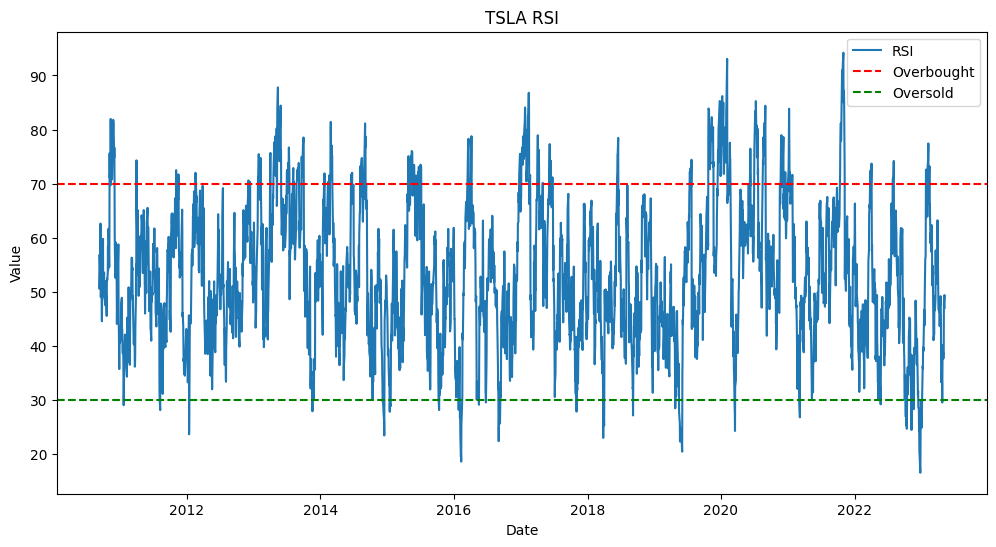

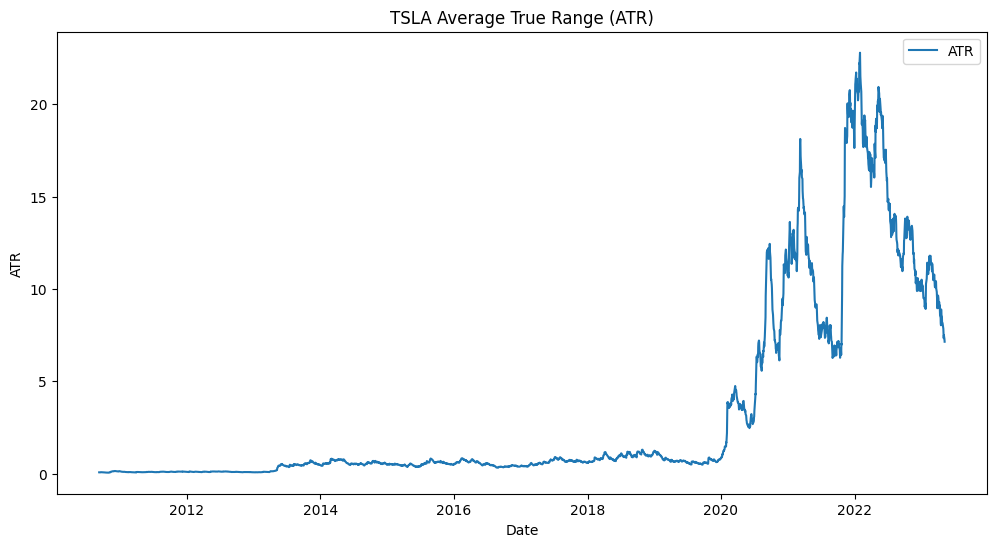

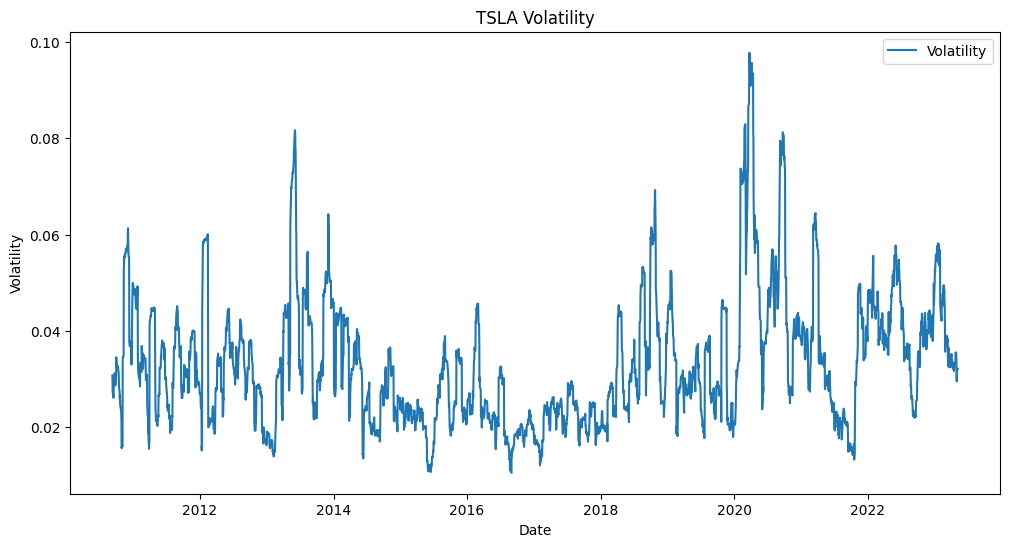

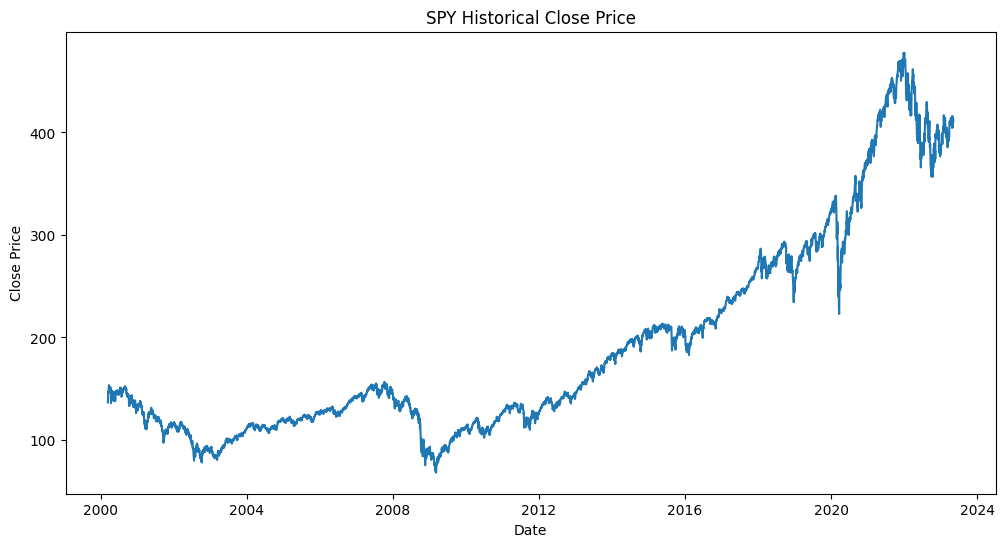

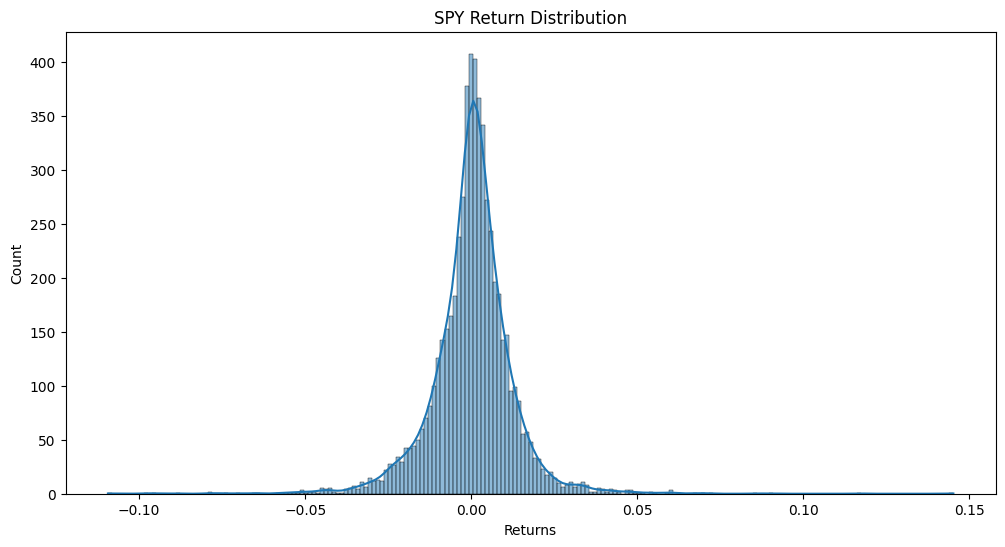

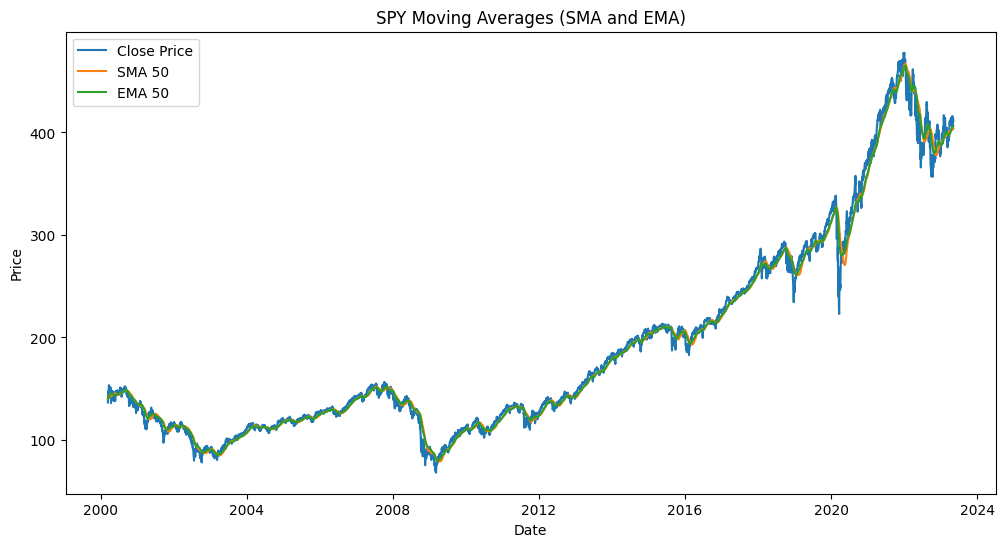

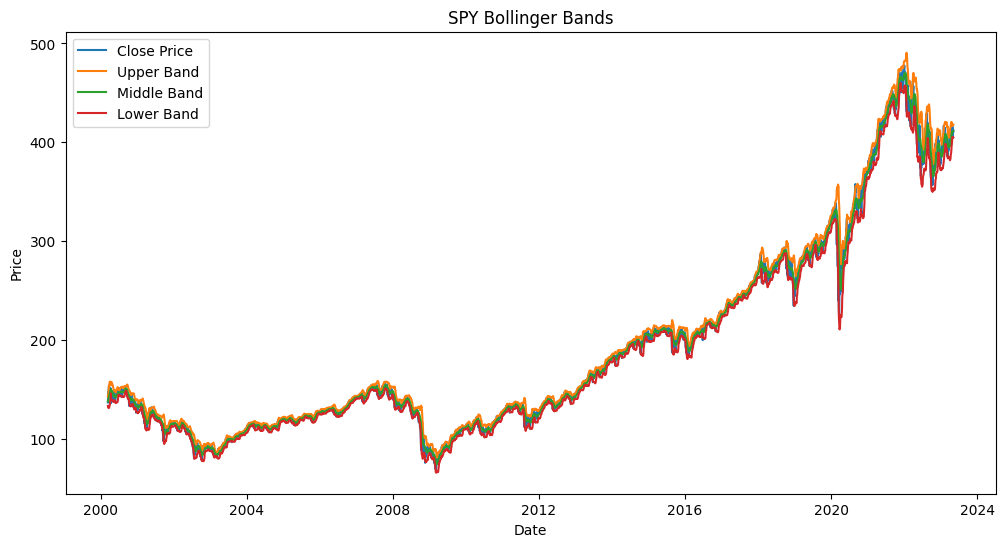

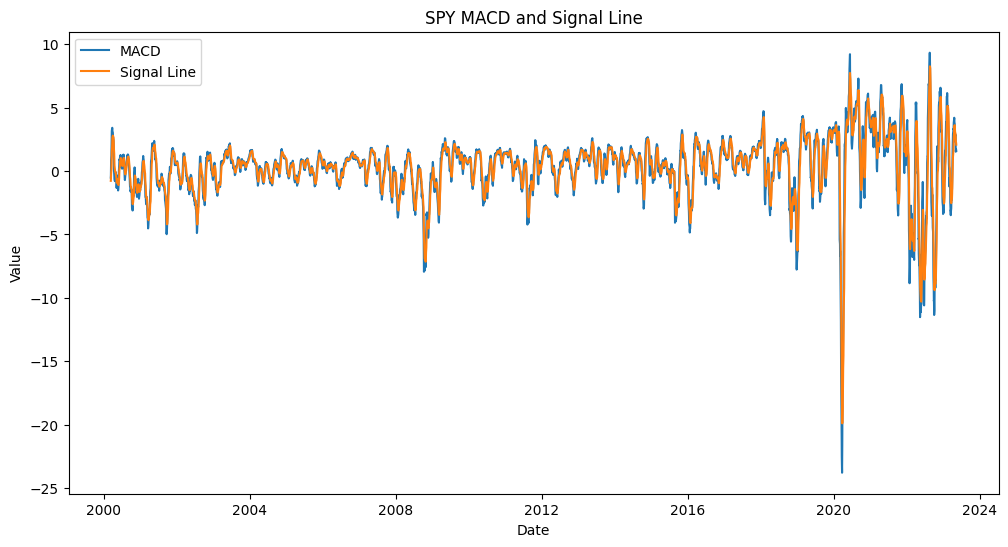

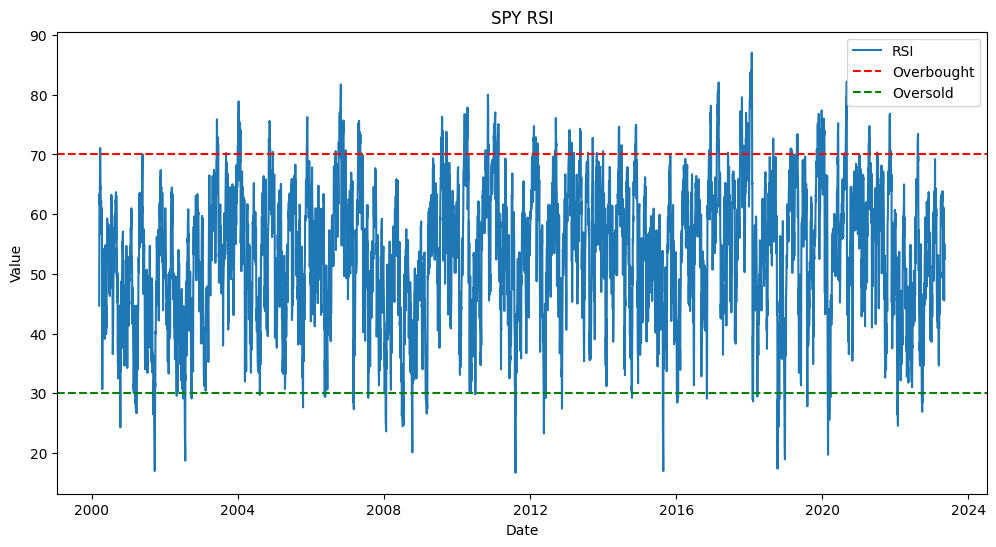

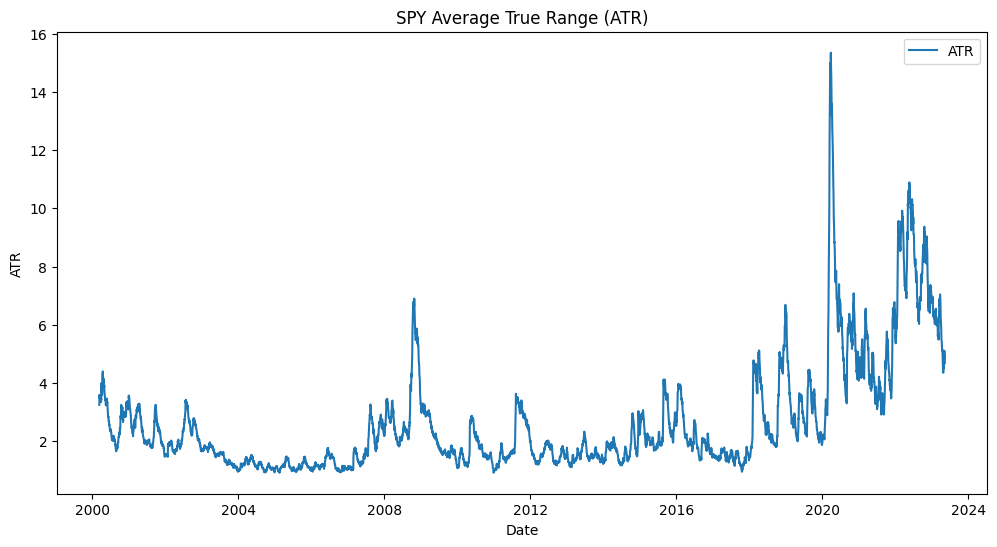

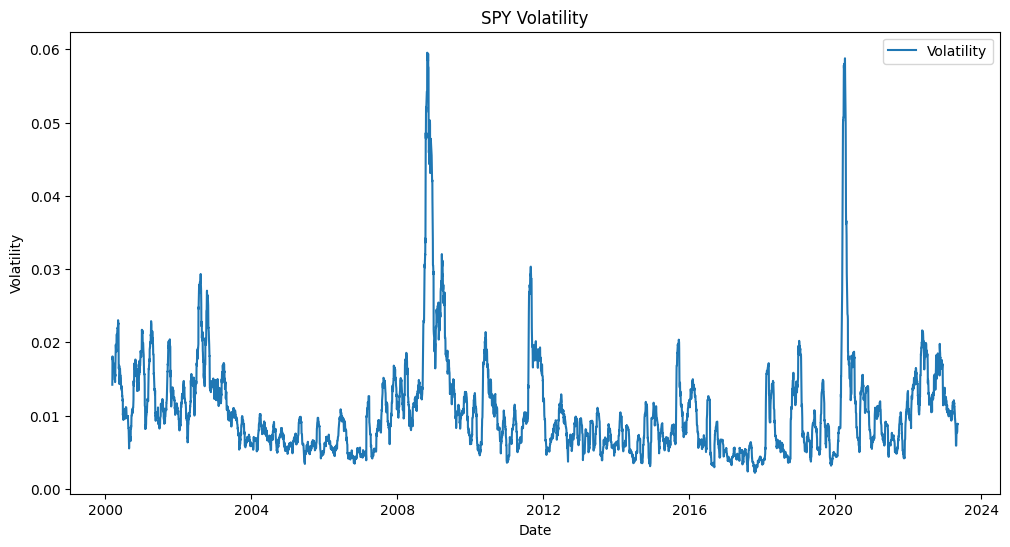

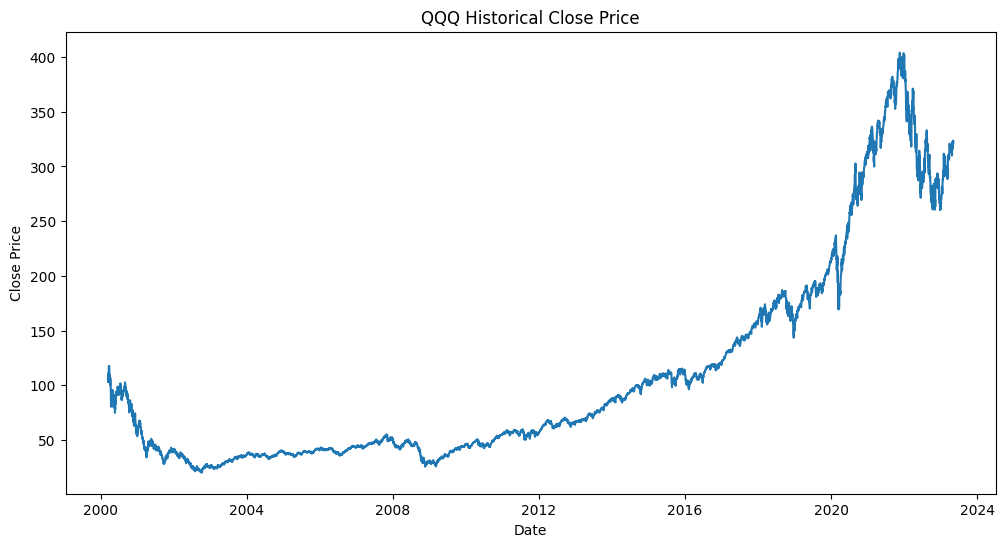

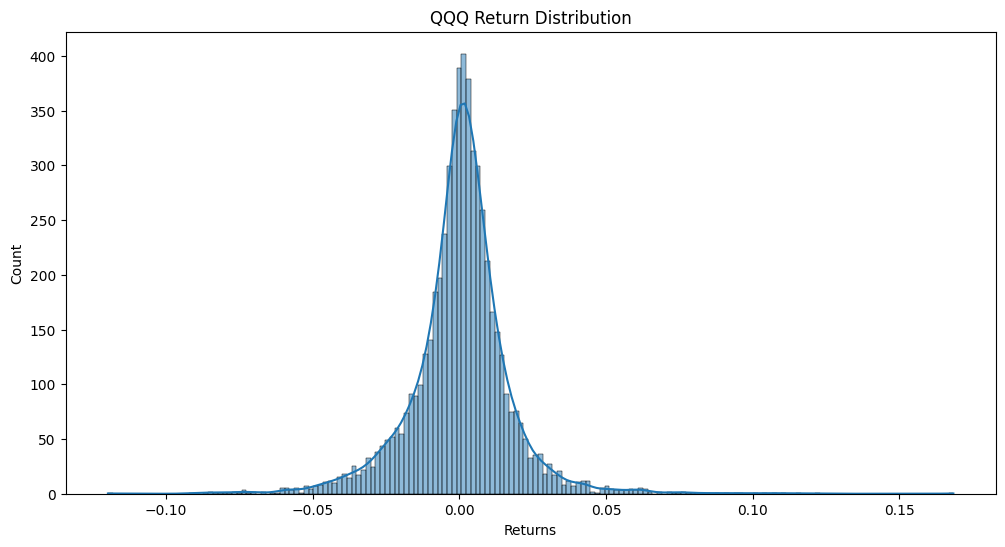

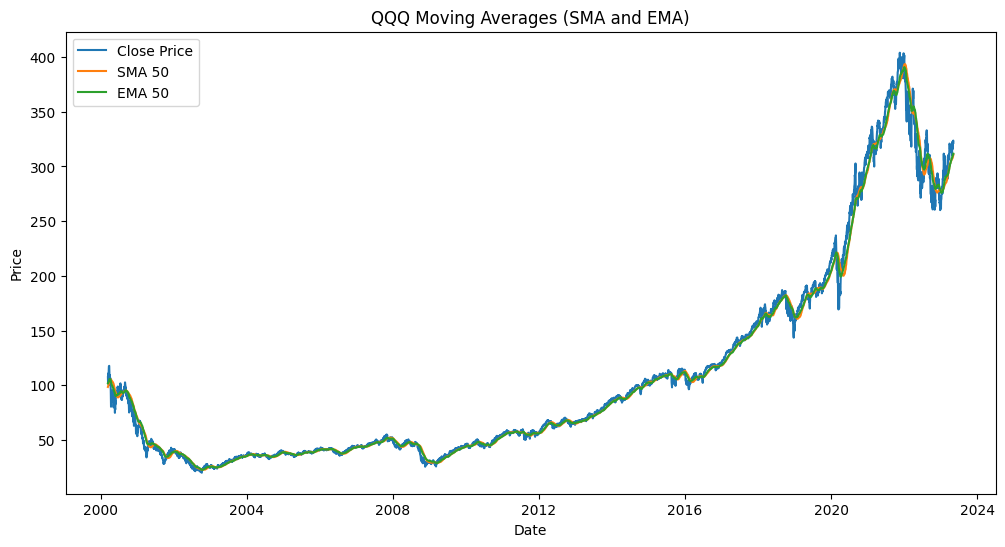

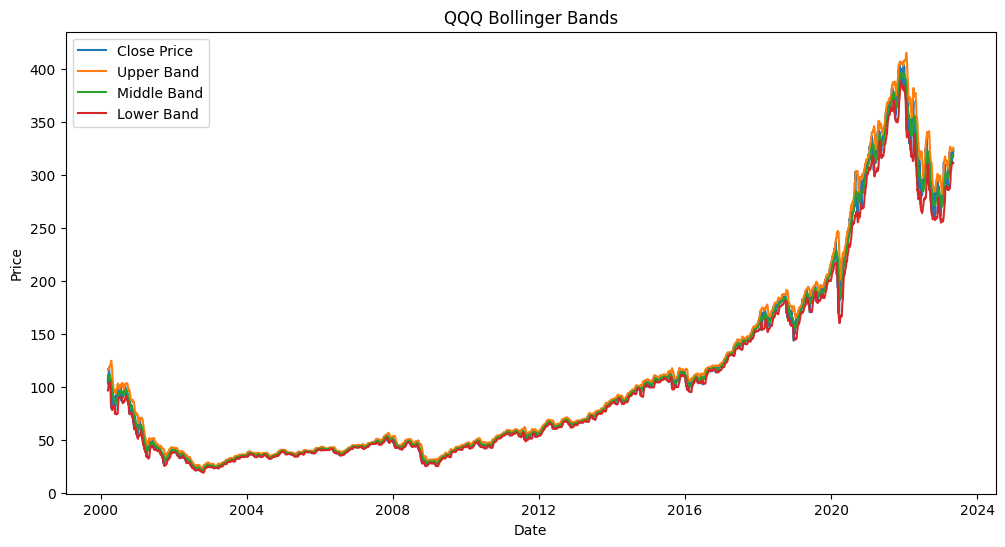

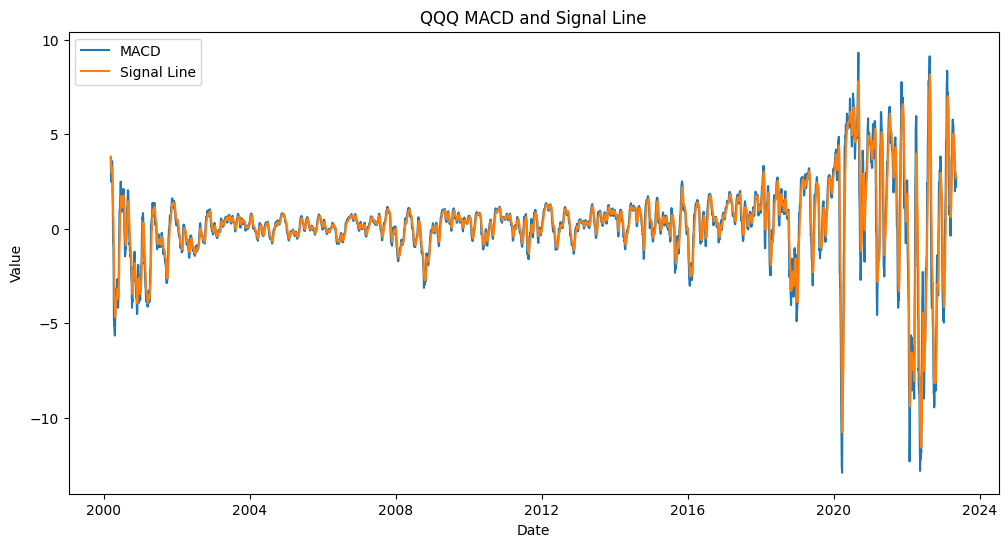

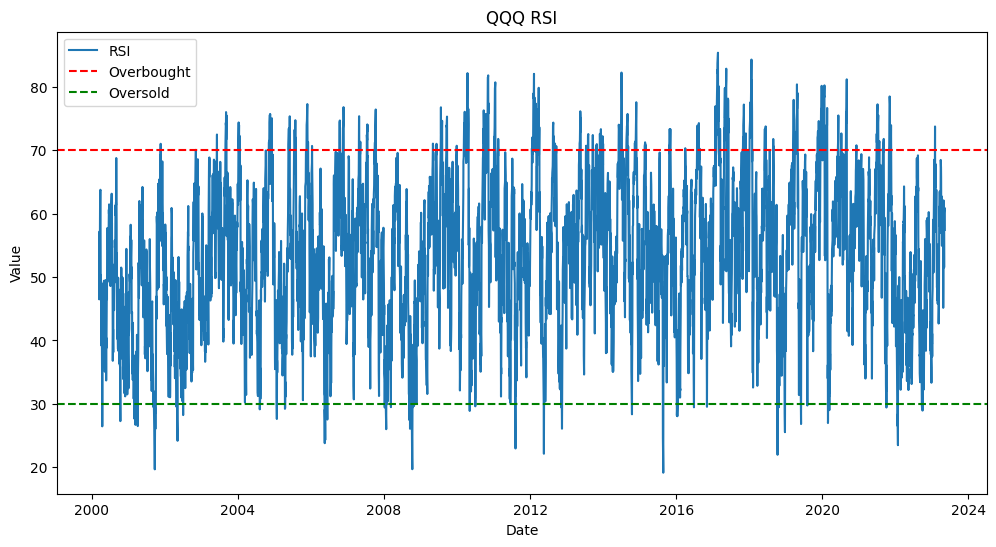

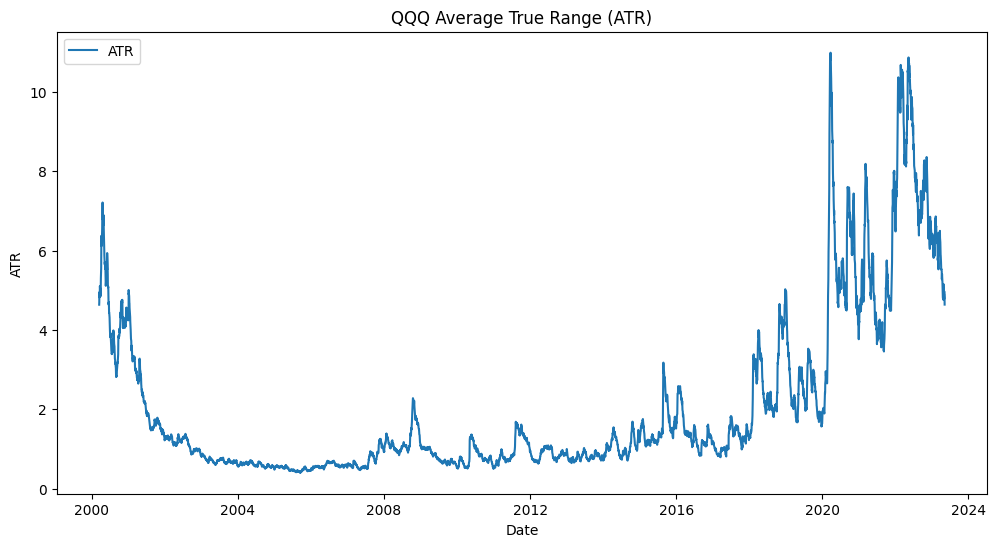

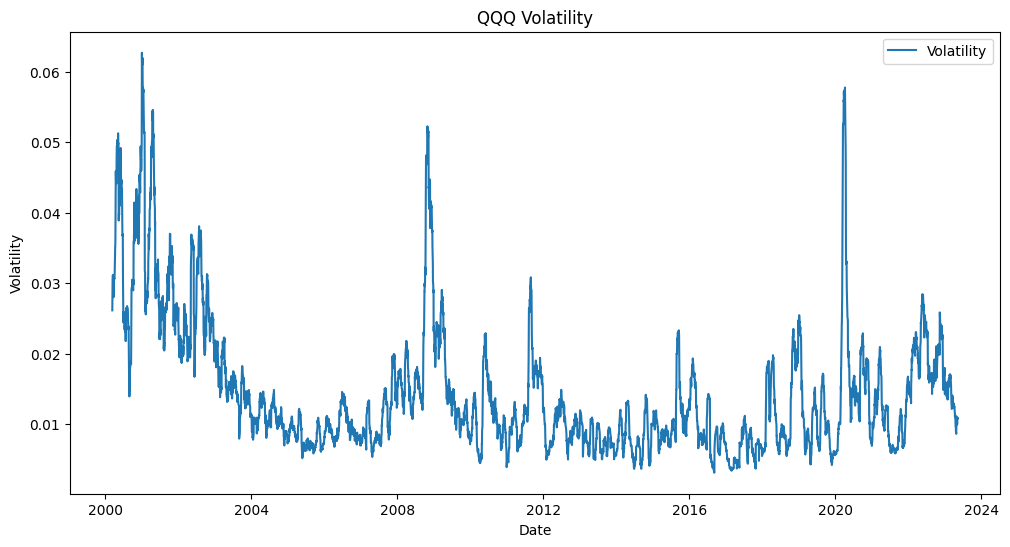

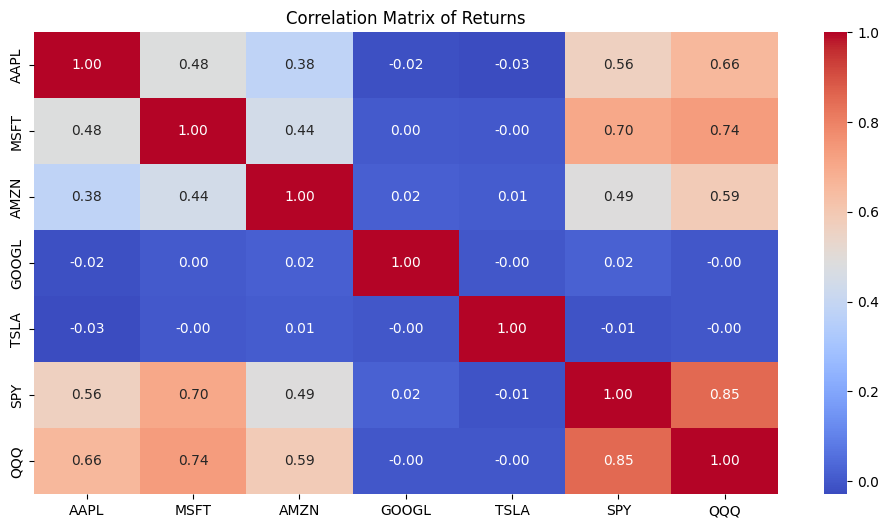

In [10]:
# Function to plot the Average True Range (ATR)
# This function takes a dataframe and a ticker symbol as inputs and plots the ATR against the Date
def plot_atr(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['ATR'], label='ATR')  # Plot ATR against Date
    plt.title(f'{ticker} Average True Range (ATR)')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('ATR')  # Set the y-axis label
    plt.legend()  # Display the legend
    plt.savefig('atr.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot Volatility
# This function takes a dataframe and a ticker symbol as inputs and plots Volatility against the Date
def plot_volatility(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['Volatility'], label='Volatility')  # Plot Volatility against Date
    plt.title(f'{ticker} Volatility')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('Volatility')  # Set the y-axis label
    plt.legend()  # Display the legend
    plt.savefig('volatility.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot the historical price data for each stock and index
# This function takes a dataframe and a ticker symbol as inputs and plots the Close price against the Date
def plot_price_data(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['Close'])  # Plot Close price against Date
    plt.title(f'{ticker} Historical Close Price')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('Close Price')  # Set the y-axis label
    plt.savefig('historical_price.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot the distribution of returns for each stock and index
# This function takes a dataframe and a ticker symbol as inputs and plots a histogram of Returns
def plot_return_distribution(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    sns.histplot(data=dataframe, x='Returns', kde=True)  # Plot a histogram of Returns
    plt.title(f'{ticker} Return Distribution')  # Set the plot title
    plt.xlabel('Returns')  # Set the x-axis label
    plt.savefig('returns.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot the moving averages (SMA and EMA) for each stock and index
# This function takes a dataframe and a ticker symbol as inputs and plots the Close price, SMA, and EMA against the Date
def plot_moving_averages(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['Close'], label='Close Price')  # Plot Close price against Date
    plt.plot(dataframe['Date'], dataframe['SMA_50'], label='SMA 50')  # Plot SMA against Date
    plt.plot(dataframe['Date'], dataframe['EMA_50'], label='EMA 50')  # Plot EMA against Date
    plt.title(f'{ticker} Moving Averages (SMA and EMA)')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('Price')  # Set the y-axis label
    plt.legend()  # Display the legend
    plt.savefig('moving_averages.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot the Bollinger Bands for each stock and index
# This function takes a dataframe and a ticker symbol as inputs and plots the Close price, and the upper, middle, and lower Bollinger Bands against the Date
def plot_bollinger_bands(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['Close'], label='Close Price')  # Plot Close price against Date
    plt.plot(dataframe['Date'], dataframe['Upper'], label='Upper Band')  # Plot the upper Bollinger Band against Date
    plt.plot(dataframe['Date'], dataframe['Middle'], label='Middle Band')  # Plot the middle Bollinger Band against Date
    plt.plot(dataframe['Date'], dataframe['Lower'], label='Lower Band')  # Plot the lower Bollinger Band against Date
    plt.title(f'{ticker} Bollinger Bands')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('Price')  # Set the y-axis label
    plt.legend()  # Display the legend
    plt.savefig('bollinger_bands.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot the MACD (Moving Average Convergence Divergence) and Signal Line for each stock and index
# This function takes a dataframe and a ticker symbol as inputs and plots the MACD and Signal Line against the Date
def plot_macd(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['MACD'], label='MACD')  # Plot the MACD against Date
    plt.plot(dataframe['Date'], dataframe['MACD Signal'], label='Signal Line')  # Plot the Signal Line against Date
    plt.title(f'{ticker} MACD and Signal Line')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('Value')  # Set the y-axis label
    plt.legend()  # Display the legend
    plt.savefig('macd.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Function to plot the RSI (Relative Strength Index) for each stock and index
# This function takes a dataframe and a ticker symbol as inputs and plots the RSI against the Date
def plot_rsi(dataframe, ticker):
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(dataframe['Date'], dataframe['RSI'], label='RSI')  # Plot the RSI against Date
    plt.axhline(70, color='red', linestyle='--', label='Overbought')  # Draw a horizontal line at 70 to represent the overbought level
    plt.axhline(30, color='green', linestyle='--', label='Oversold')  # Draw a horizontal line at 30 to represent the oversold level
    plt.title(f'{ticker} RSI')  # Set the plot title
    plt.xlabel('Date')  # Set the x-axis label
    plt.ylabel('Value')  # Set the y-axis label
    plt.legend()  # Display the legend
    plt.savefig('rsi.png')  # Save the plot as a png file
    plt.show()  # Display the plot
    
# Function to plot the correlation matrix between stocks' returns
# This function takes a dataframe of returns data as input and plots a heatmap of the correlation matrix
def plot_correlation_matrix(returns_data):
    corr_matrix = returns_data.corr()  # Compute the correlation matrix of the returns data
    plt.figure(figsize=(12, 6))  # Set the figure size
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Plot a heatmap of the correlation matrix
    plt.title('Correlation Matrix of Returns')  # Set the plot title
    plt.savefig('correlation.png')  # Save the plot as a png file
    plt.show()  # Display the plot

# Loop through each ticker and its corresponding historical data
for ticker, data in historical_data.items():
    # Plot the historical price data
    plot_price_data(data, ticker)
    # Plot the return distribution
    plot_return_distribution(data, ticker)
    # Plot the moving averages
    plot_moving_averages(data, ticker)
    # Plot the Bollinger Bands
    plot_bollinger_bands(data, ticker)
    # Plot the MACD and Signal Line
    plot_macd(data, ticker)
    # Plot the RSI
    plot_rsi(data, ticker)
     # Plot the ATR
    plot_atr(data, ticker)
    # Plot the volatility
    plot_volatility(data, ticker)

# Create a DataFrame containing the returns for each stock and index
returns_data = pd.DataFrame()
for ticker, data in historical_data.items():
    returns_data[ticker] = data['Returns']

# Plot the correlation matrix between the returns of each stock and index
plot_correlation_matrix(returns_data)